In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd

In [17]:
from matplotlib.colors import LogNorm, SymLogNorm

In [6]:
pwd

'C:\\Users\\NPLAB\\Data\\Triton\\AnalysisNotebooks'

In [7]:
qc.DataSet.default_io.base_location = 'C:\\Users\\NPLAB\\Data\\Triton'

In [8]:
figfile = '../Figures/191004_M05_M08_M09_SC/'

# Device M08, contacts 38-37, the ones with a large hole pocket of SC

In [84]:
datafan1 = qc.load_data('data/2019-10-04/#040_0to8TtwodSweep_0.5nAexcM08_Rxx38-37_Rxy38-44_basetemp_19-25-12')
datafan2 = qc.load_data('data/2019-10-05/#002_8to0TtwodSweep_0.5nAexcM08_Rxx38-37_Rxy38-44_basetemp_09-35-45')
datafan2 = qc.load_data('data/2019-10-17/#002_M08_Rxx38-37_Rxy38-44_0p2nA_0to7p5Vbg_fielddown_narrow_15-45-50')

In [6]:
%matplotlib notebook

In [115]:
datafan1.triton_field_set_stable_set[:-37]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3])

<IPython.core.display.Javascript object>


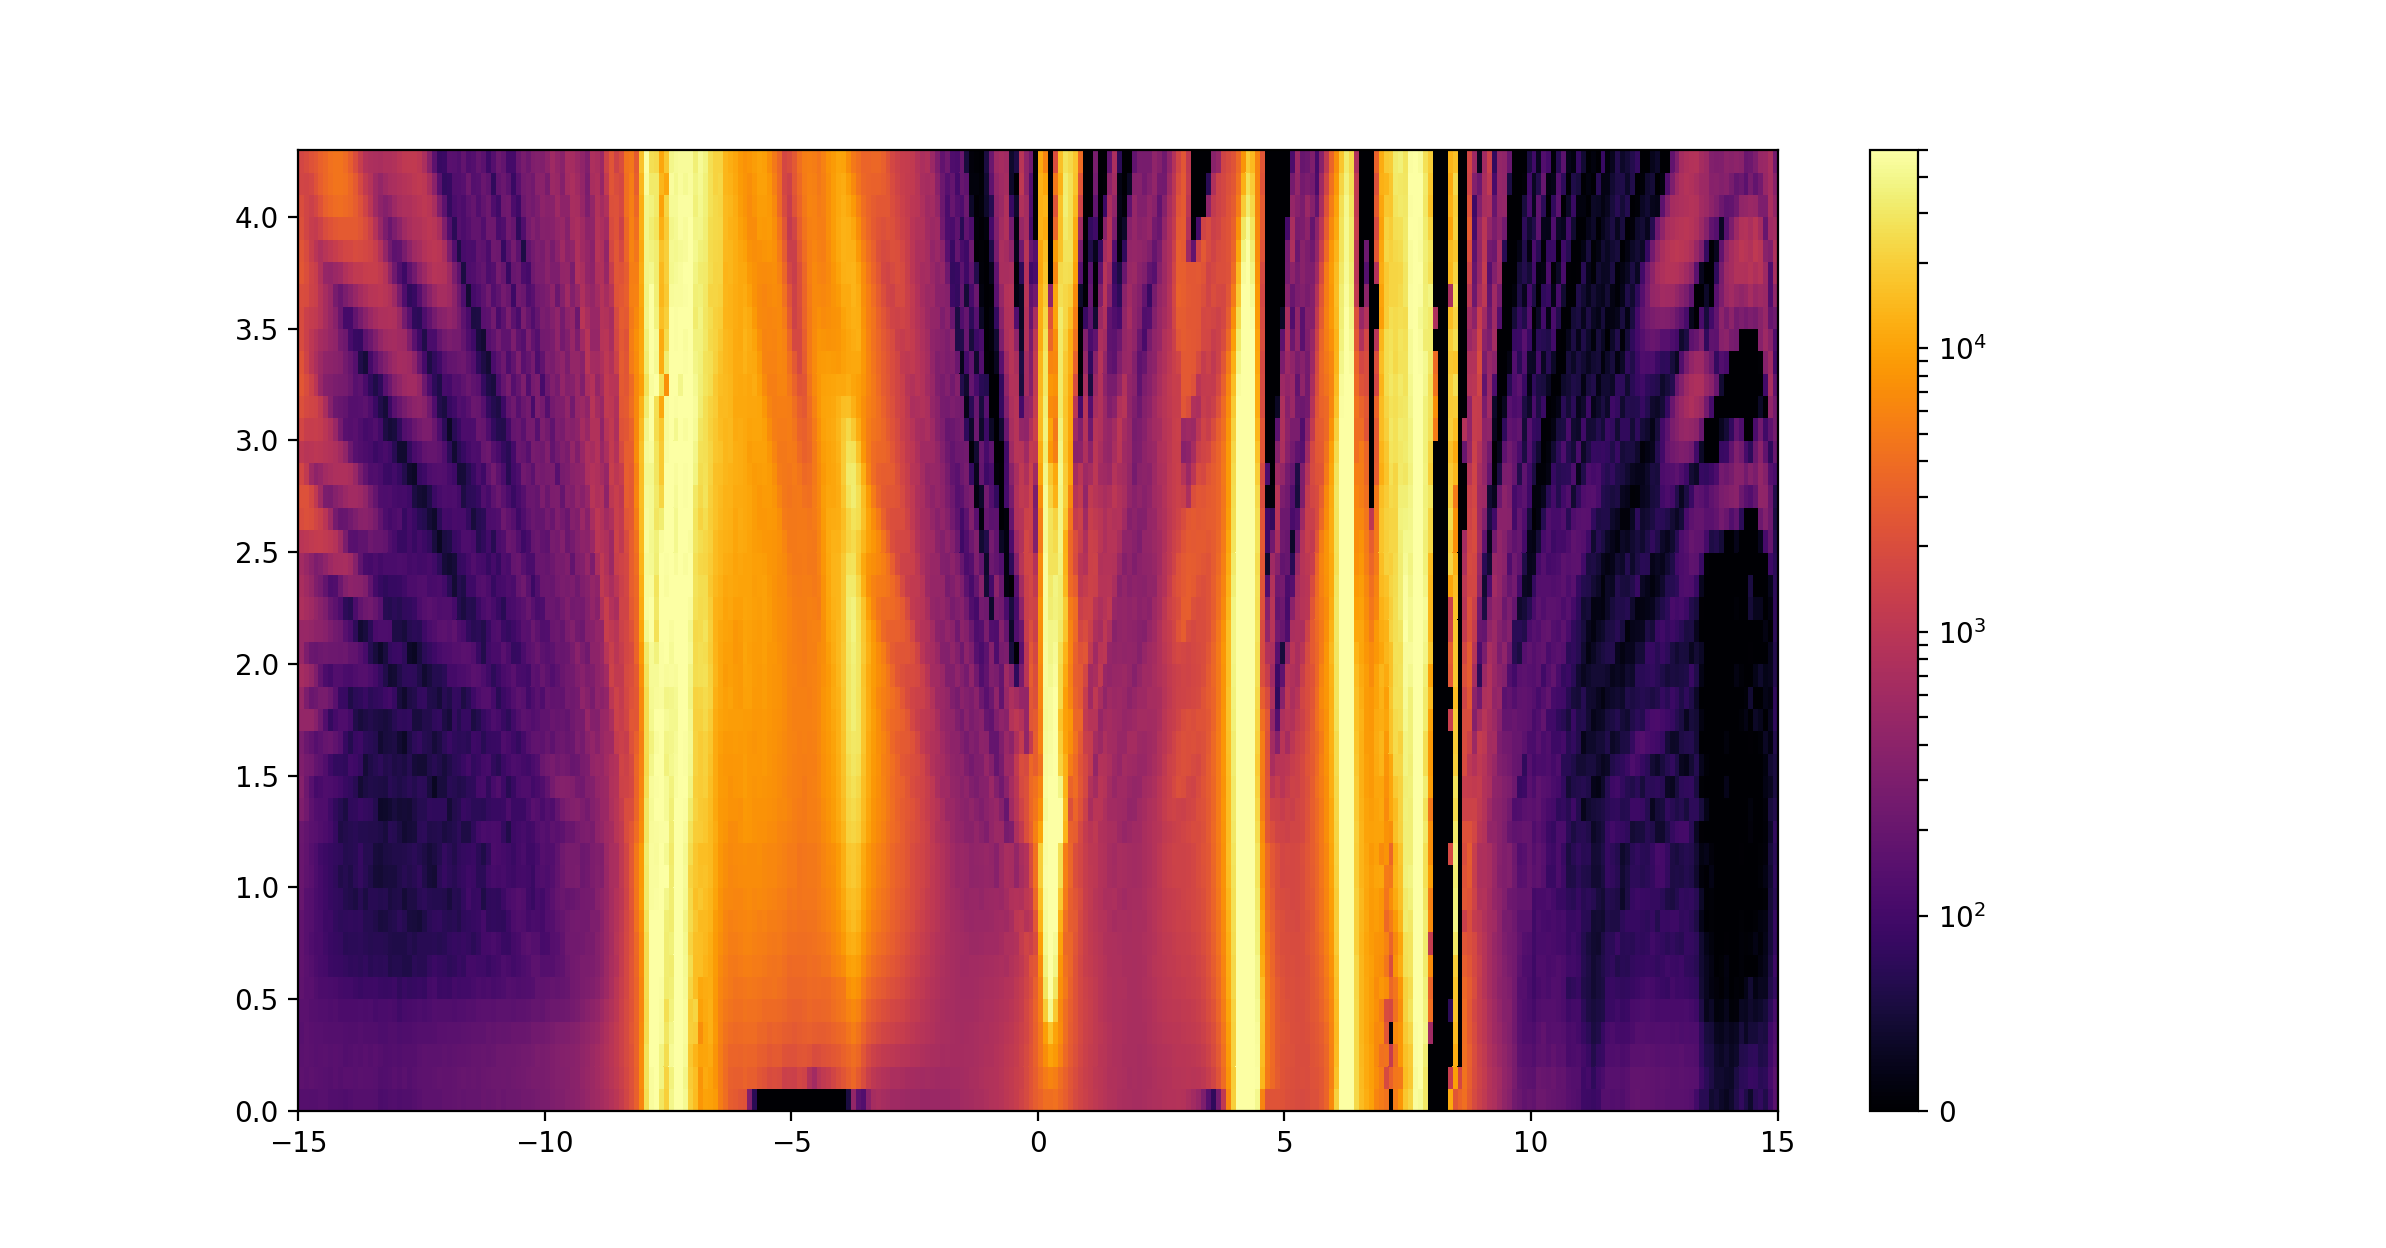

In [37]:
plt.figure(figsize=(10,6))
plt.pcolormesh(datafan1.srframe_volt_p1_set[0, :], datafan1.triton_field_set_stable_set[:-37], datafan1.lockin865_X[:-37,:]/1e-9, cmap='inferno', norm=SymLogNorm(100, vmin=0, vmax=5*10**4))
plt.colorbar()

In [33]:
datafan2.triton_field_set_stable_set[:27]

array([8. , 7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8,
       6.7, 6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5,
       5.4])

<IPython.core.display.Javascript object>


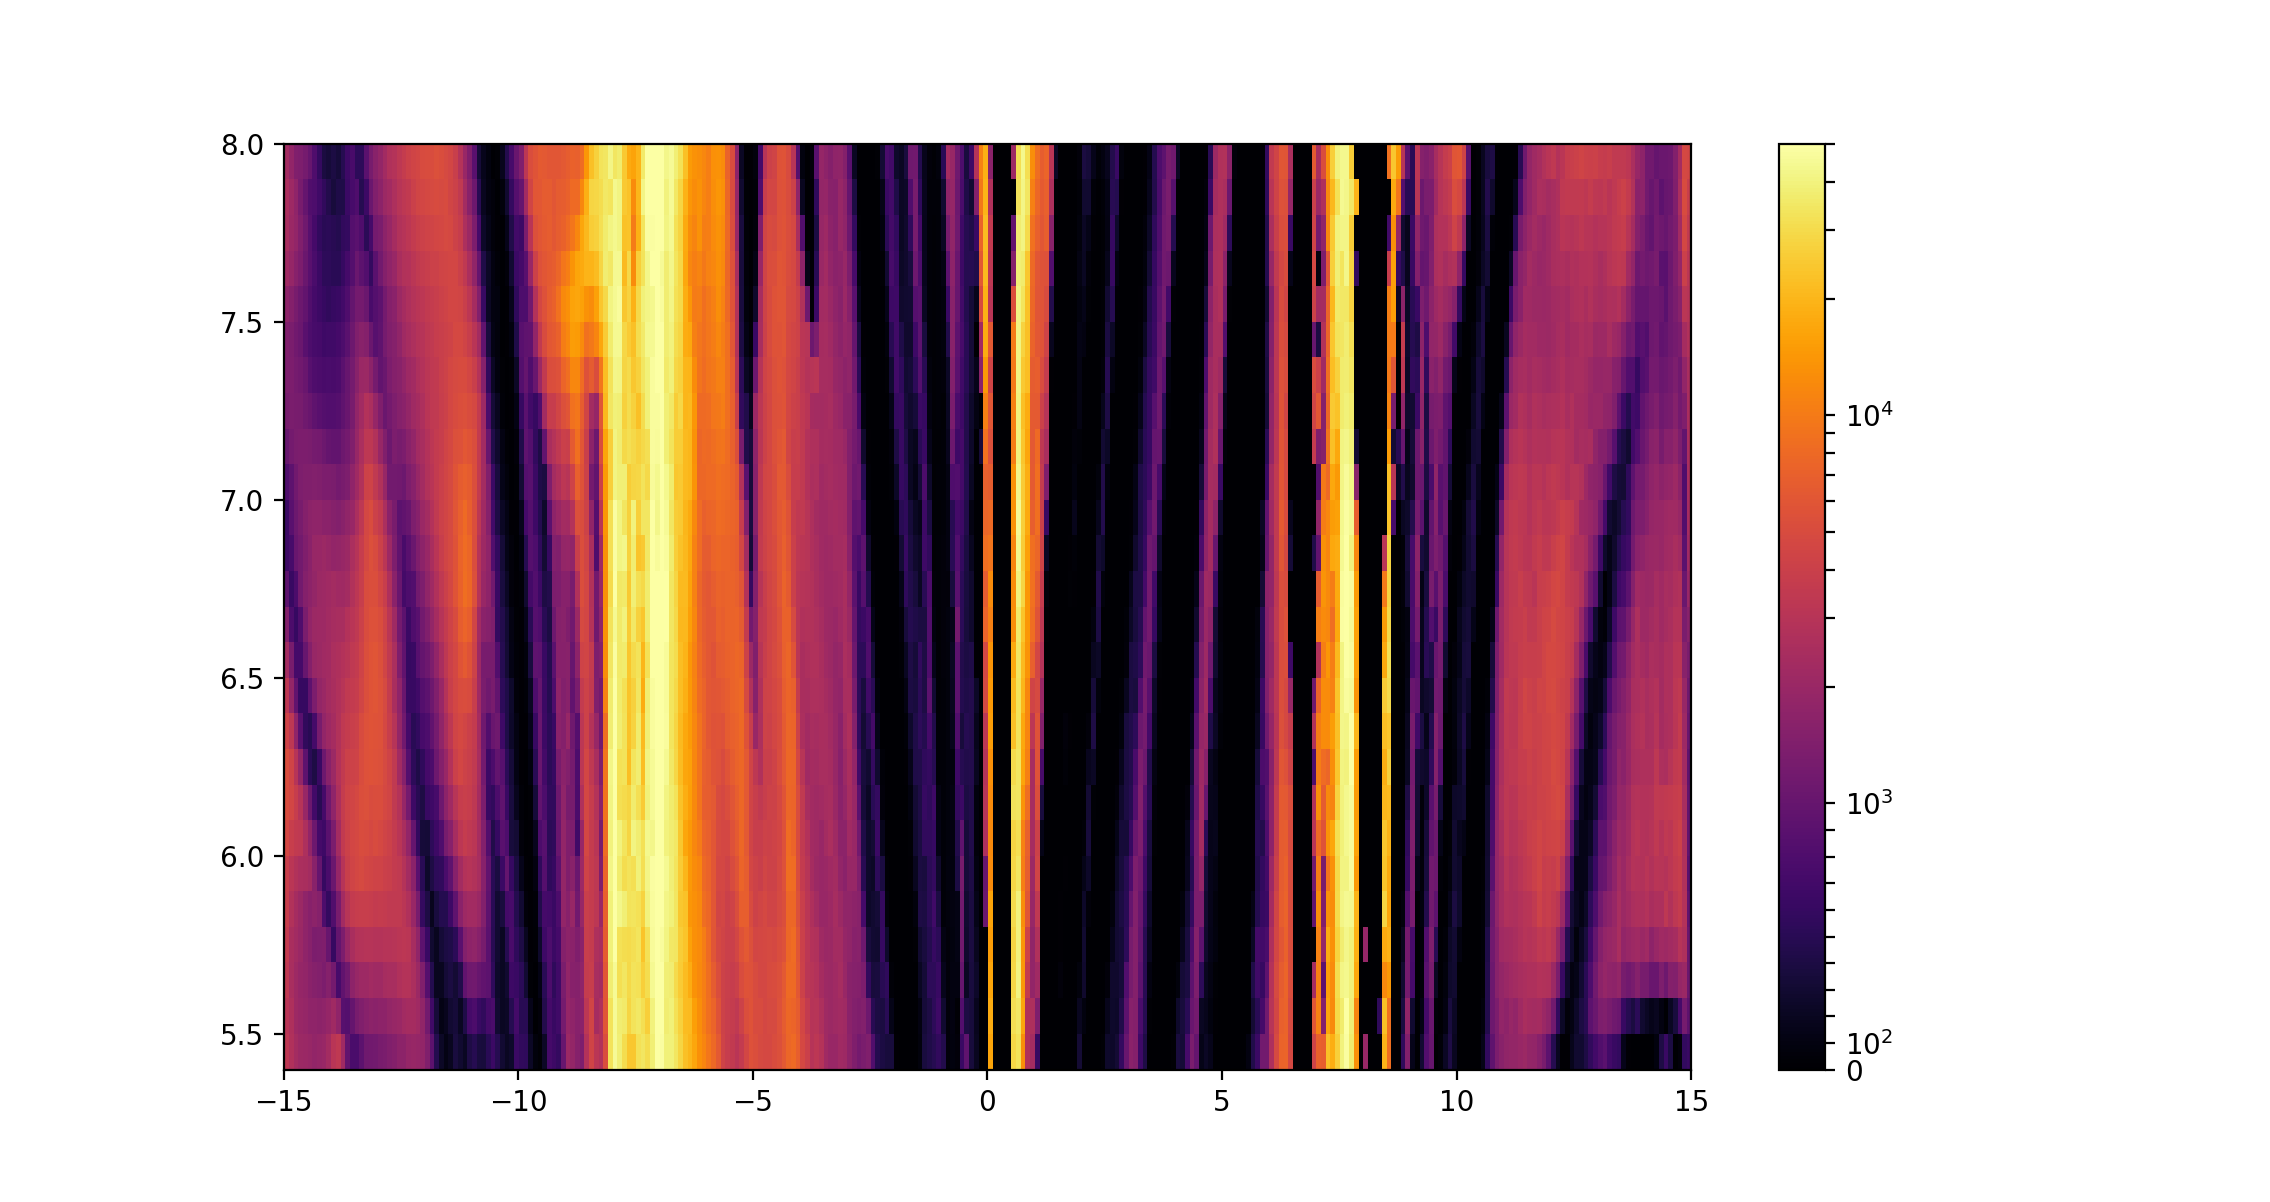

In [36]:
plt.figure(figsize=(10,6))
plt.pcolormesh(datafan2.srframe_volt_p1_set[0, :], datafan2.triton_field_set_stable_set[:27], datafan2.lockin865_X[:27,:]/1e-9, cmap='inferno', norm=SymLogNorm(1000, vmin=0, vmax=5*10**4))
plt.colorbar()

Try finding the twist angle by looking at the fans from the CNP and the full-filling bands

In [7]:

gs1 = datafan1.srframe_volt_p1_set[0, :]
Rs1 = datafan1.lockin865_X[:, :]/0.5e-9

gs2 = datafan2.srframe_volt_p1_set[0, :]
Rs2 = datafan2.lockin865_X[:, :]/0.5e-9

<IPython.core.display.Javascript object>


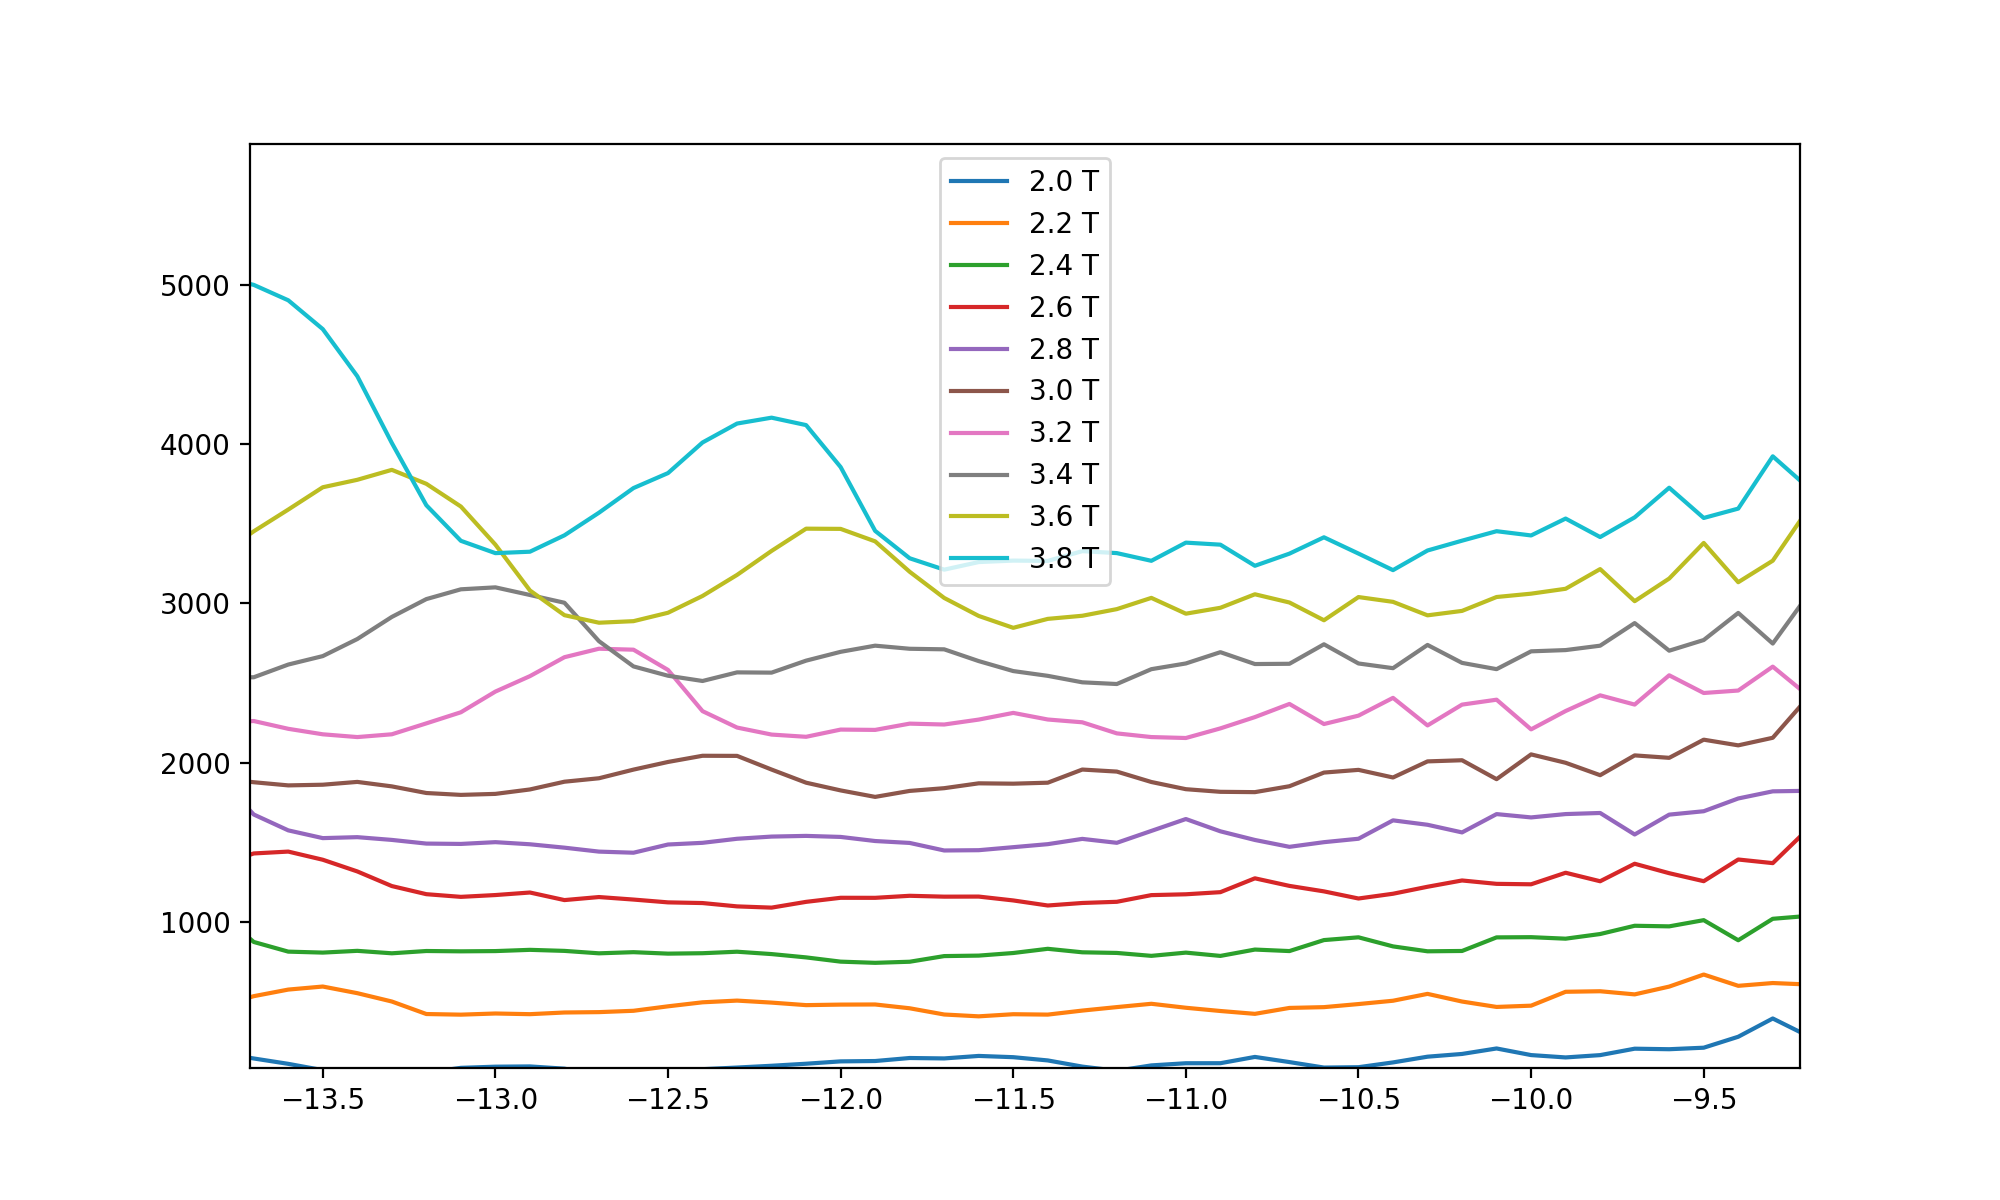

In [84]:
plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(gs1, Rs1[20+2*i, :]+350*i, label='{:.1f} T'.format(datafan1.triton_field_set_stable_set[20+2*i]))
plt.legend()

In [30]:
# hole side of the CNP
vs1 = [-0.374, -0.398, -0.423, -0.472, -0.503, -0.552, -0.589, -0.632, -0.651, -0.681, -0.706, -0.743, -0.768, -0.804, -0.835, -0.872, -0.909, -0.934, -0.964, -0.989, -1.89, -1.95, -2.02, -2.08, -2.16, -2.27, -2.32, -2.40, -2.42, -2.51]
Bs1 = np.concatenate((np.linspace(2, 3.9, 20), np.linspace(6.2, 8, 10)))

vshalf = [-0.813, -0.835, -0.867, -0.921, -0.943, -0.964, -1.01, -1.05, -1.07, -1.09]
Bshalf = np.linspace(6.2, 8, 10)

vs2 = [-0.792, -0.82, -0.88, -0.946, -0.995, -1.051, -1.088, -1.149, -1.217, -1.266, -1.321, -1.371, -1.432, -1.475, -1.549, -1.586, -1.654, -1.678, -1.734, -1.783]
Bs2 = np.linspace(2, 3.9, 20)

vs3 = [-1.08, -1.137, -1.223, -1.284, -1.364, -1.444, -1.487, -1.555, -1.617, -1.703]
Bs3 = np.linspace(2, 2.9, 10)

vstot = np.concatenate((vs1, vs2, vs3, vshalf))
Bstot = np.concatenate((Bs1*4, Bs2*6, Bs3*8, Bshalf*2))

sl, b = np.polyfit(vstot, Bstot, 1)

<IPython.core.display.Javascript object>


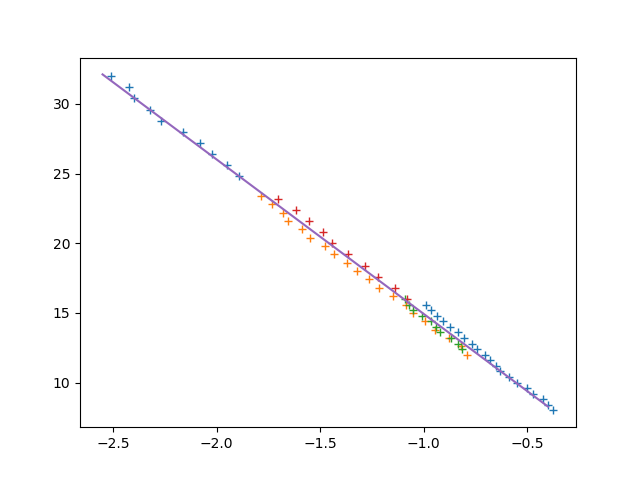

In [31]:
plt.figure()
plt.plot(vs1, Bs1*4, '+')
plt.plot(vs2, Bs2*6, '+')
plt.plot(vshalf, Bshalf*2, '+')
plt.plot(vs3, Bs3*8, '+')
xfit = np.array([-2.55, -0.4])
plt.plot(xfit, sl*xfit+b)

In [32]:
C = -sl*1.602e-19**2/6.626e-34
dBN = 3*8.85e-12/C
V0 = -b/sl
print('effective hBN thickness: {:.1f} nm'.format(dBN*10**9))
print('V0: ', V0)

effective hBN thickness: 61.8 nm
V0:  0.34537750837960857


In [44]:
# outside of full filling hole side
vsf1 = [-8.488, -8.534, -8.632, -8.684, -8.731, -8.783, -8.870, -8.939, -9.009, -9.032, -9.816, -9.87, -9.93, -9.99, -10.07, -10.14, -10.23, -10.29, -10.41, -10.51]
Bsf1 = np.concatenate((np.array([2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8]), np.linspace(6.2, 8, 10)))

vs1andhalf = [-11.97, -12.13, -12.25, -12.35, -12.41, -12.58, -12.83, -12.99, -13.13, -13.32]
Bs1andhalf = np.linspace(6.2, 8, 10)

vsf2 = [-9.866, -10.046, -10.254, -10.428, -10.648, -10.851, -11.031, -11.233, -11.500, -11.679]
Bsf2 = np.array([2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8])

vsf3 = [-11.662, -11.905, -12.155, -12.456, -12.682, -12.989]
Bsf3 = np.array([2.8, 3, 3.2, 3.4, 3.6, 3.8])

vsftot = np.concatenate((vsf1, vs1andhalf, vsf2, vsf3))
Bsftot = np.concatenate((Bsf1*4, Bs1andhalf*8, Bsf2*12, Bsf3*16))

slf, bf = np.polyfit(vsftot, Bsftot, 1)

<IPython.core.display.Javascript object>


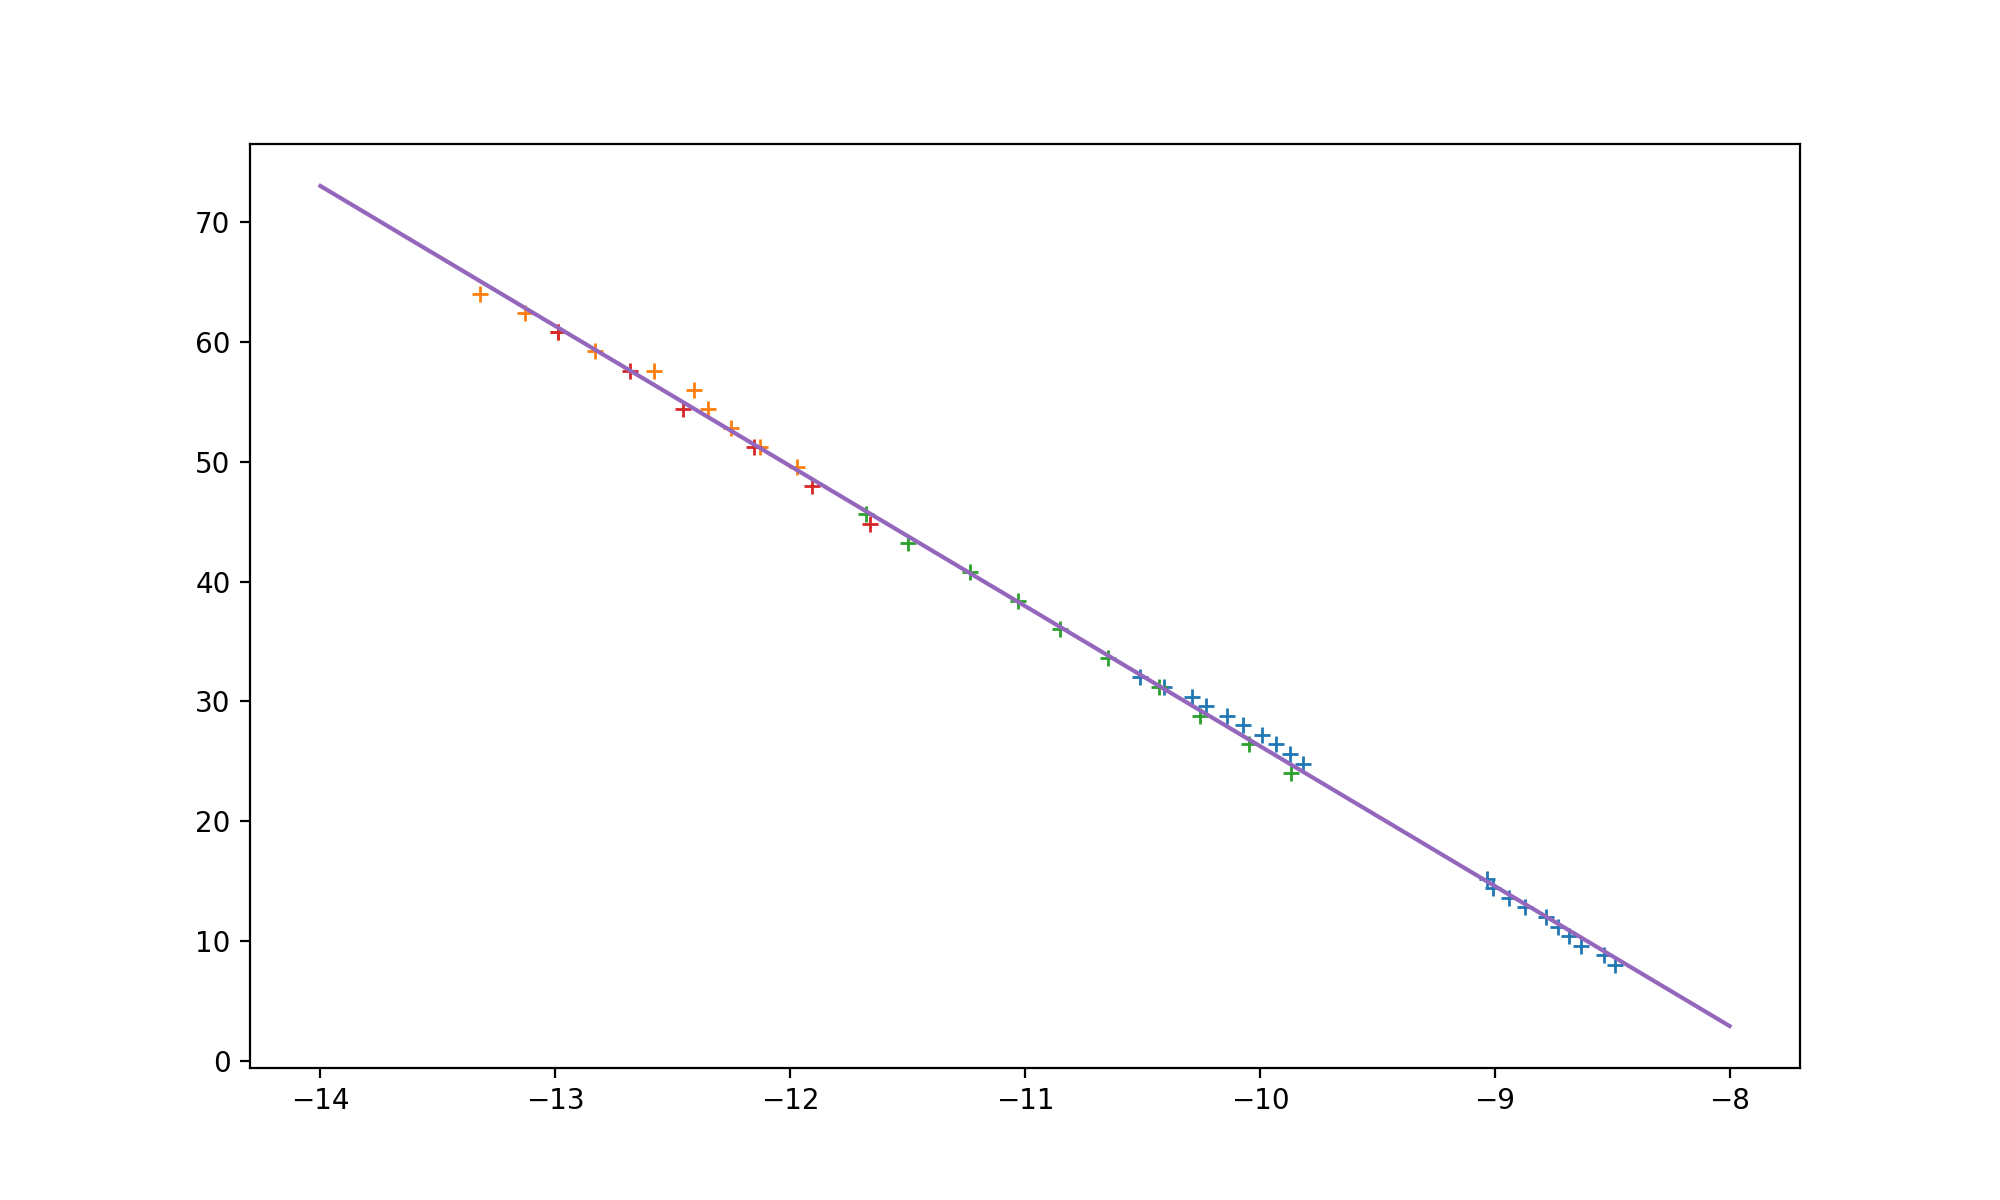

In [45]:
plt.figure(figsize=(10,6))
plt.plot(vsf1, Bsf1*4, '+')
plt.plot(vs1andhalf, Bs1andhalf*8, '+')
plt.plot(vsf2, Bsf2*12, '+')
plt.plot(vsf3, Bsf3*16, '+')
xfitf = np.array([-14, -8])
plt.plot(xfitf, slf*xfitf + bf)

In [46]:
V0fullh = -bf/slf
print(V0fullh)

-7.751391240006241


In [47]:
nfull = (V0 - V0fullh)*C/1.602e-19/10**4
print(nfull/10**12) #10**12 cm^-2
a = 0.246e-9

theta = np.sqrt(np.sqrt(3)*nfull*10**4*a**2/8)*180/np.pi
print('theta: ', theta)

2.1719310186941034
theta:  0.9665316357706046


<IPython.core.display.Javascript object>


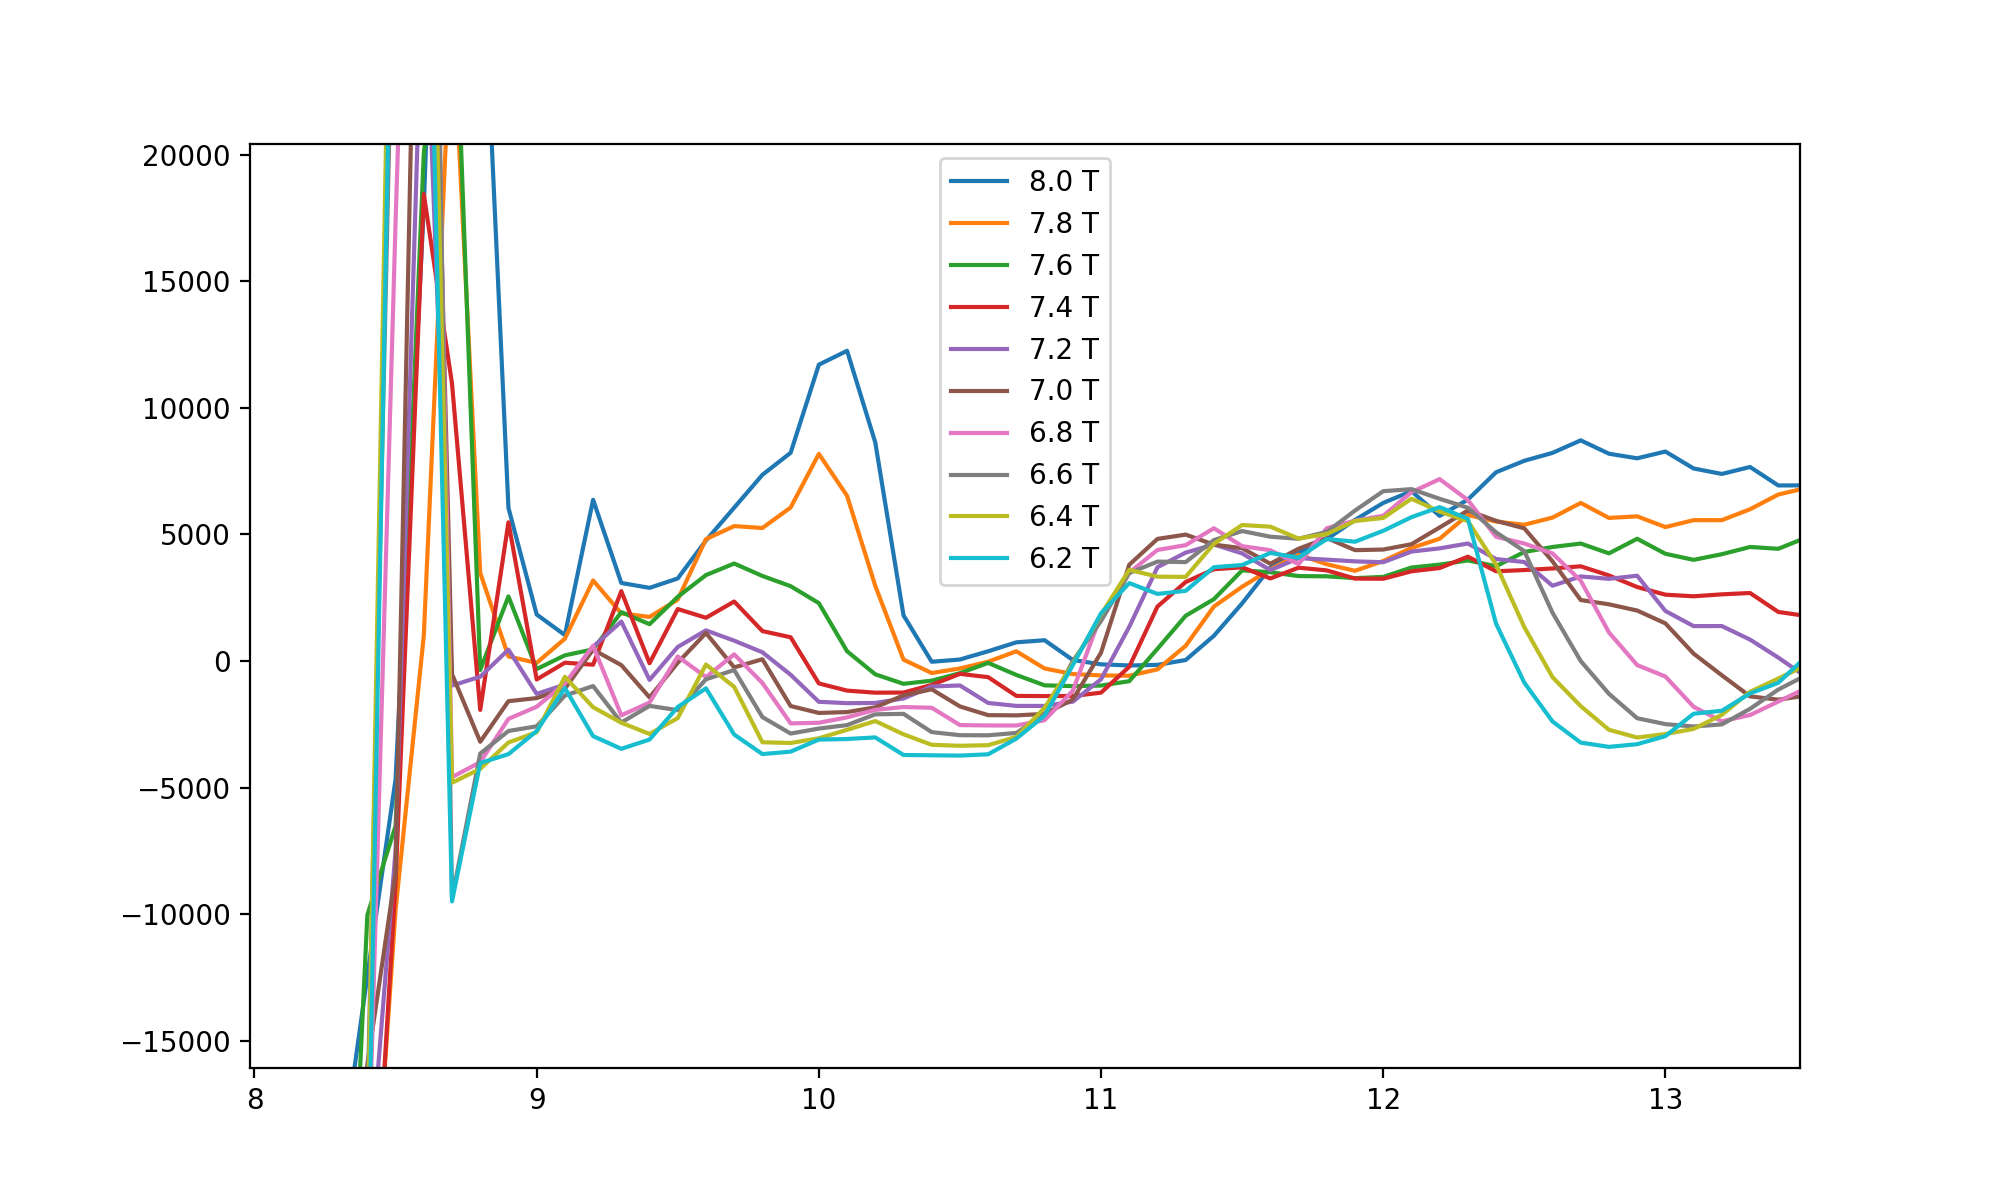

In [8]:
plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(gs2, Rs2[2*i, :]-400*i, label='{:.1f} T'.format(datafan2.triton_field_set_stable_set[2*i]))
plt.legend()

Plot the partial fan that we have so far

In [118]:
zspace = np.zeros((10, len(datafan1.srframe_volt_p1_set[0, :])))

In [122]:
partialfan = np.vstack((Rs2[:27], zspace, np.flip(Rs1[:-37, :], axis=0)))

In [127]:
pfan = np.nan_to_num(np.flip(partialfan, axis=0))

In [128]:
pfan.shape

(81, 301)

In [11]:
fields = np.linspace(0, 8, 81) # T
gates = gs1

<IPython.core.display.Javascript object>


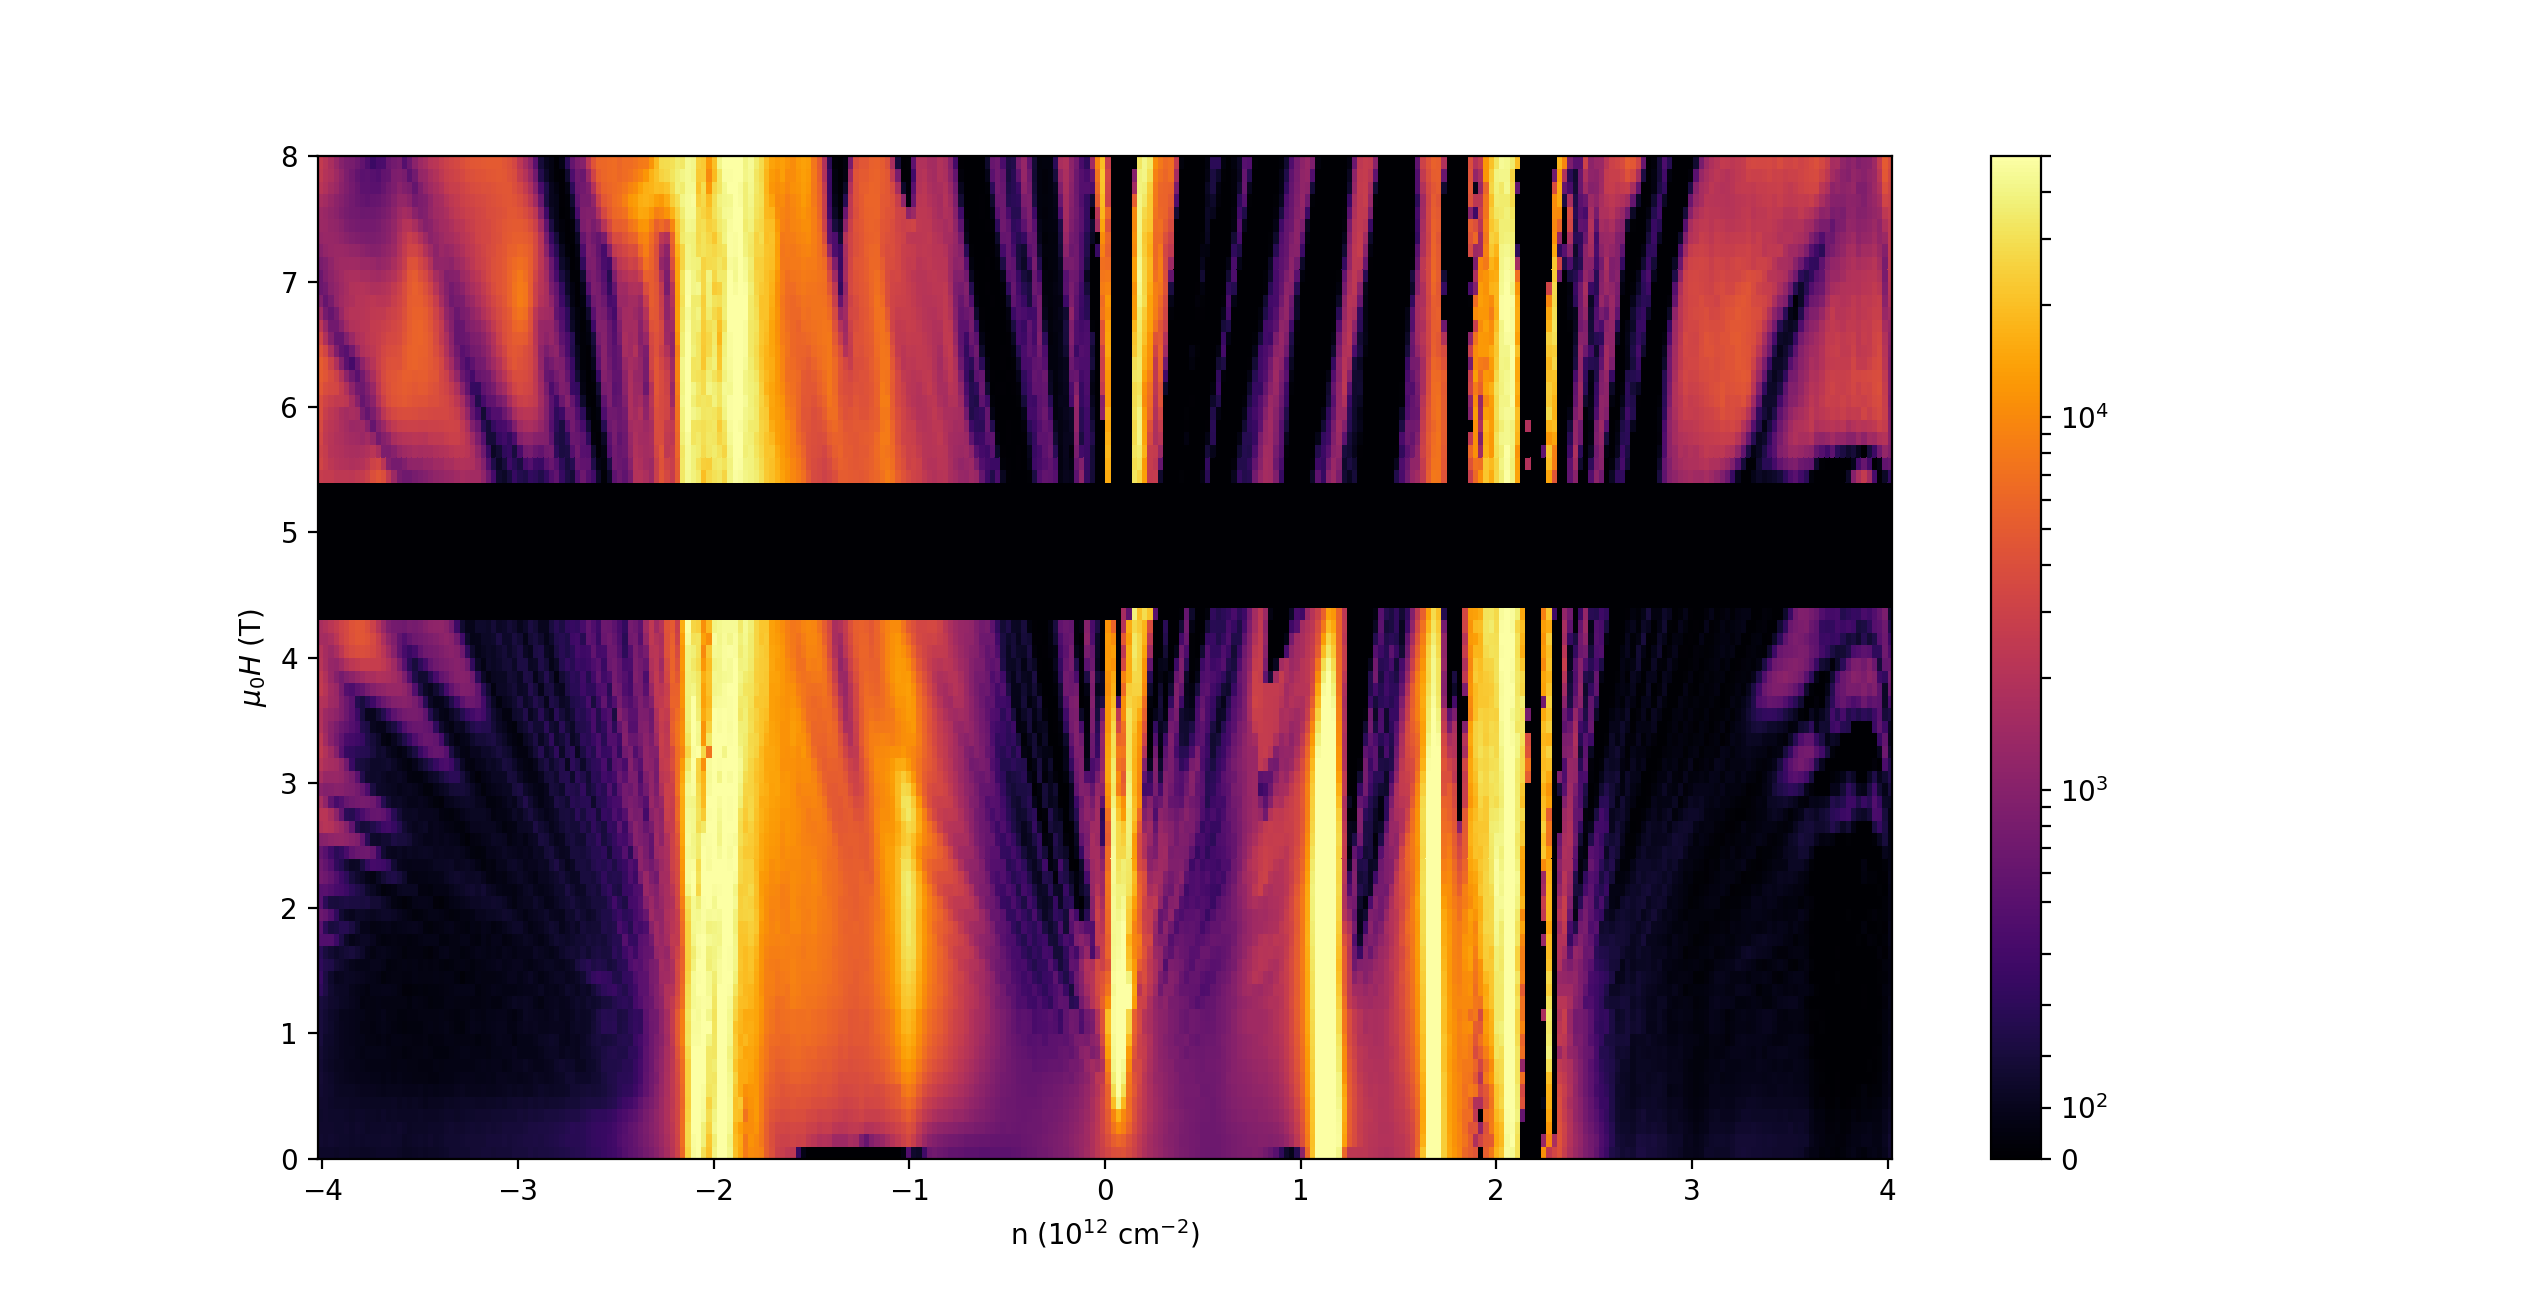

Text(0, 0.5, '$\\mu_0 H$ (T)')

In [132]:
plt.figure(figsize=(10,6))
plt.pcolormesh(gates*C/1.602e-19/10**16, fields, pfan, cmap='inferno', norm=SymLogNorm(500, vmin=0, vmax=5*10**4))
plt.colorbar()
plt.xlabel('n (10$^{12}$ cm$^{-2}$)')
plt.ylabel('$\mu_0 H$ (T)')

In [135]:
plt.savefig(figfile+'partialfan', dpi=400)

# Complete landau fan diagram, both Rxx and Rxy

In [12]:
datafan = qc.load_data('data/2019-10-06/#003_0to8TtwodSweep_0.5nAexcM08_Rxx38-37_Rxy38-44_basetemp_161fieldpts_16-35-30')

Rxxfan = datafan.lockin865_X[:, :]/0.5e-9
Rxyfan = datafan.lockin830_X[:, :]/0.5e-9
gfan = datafan.srframe_volt_p1_set[0, :]
fieldsfan = datafan.triton_field_set_stable_set[:]

<IPython.core.display.Javascript object>


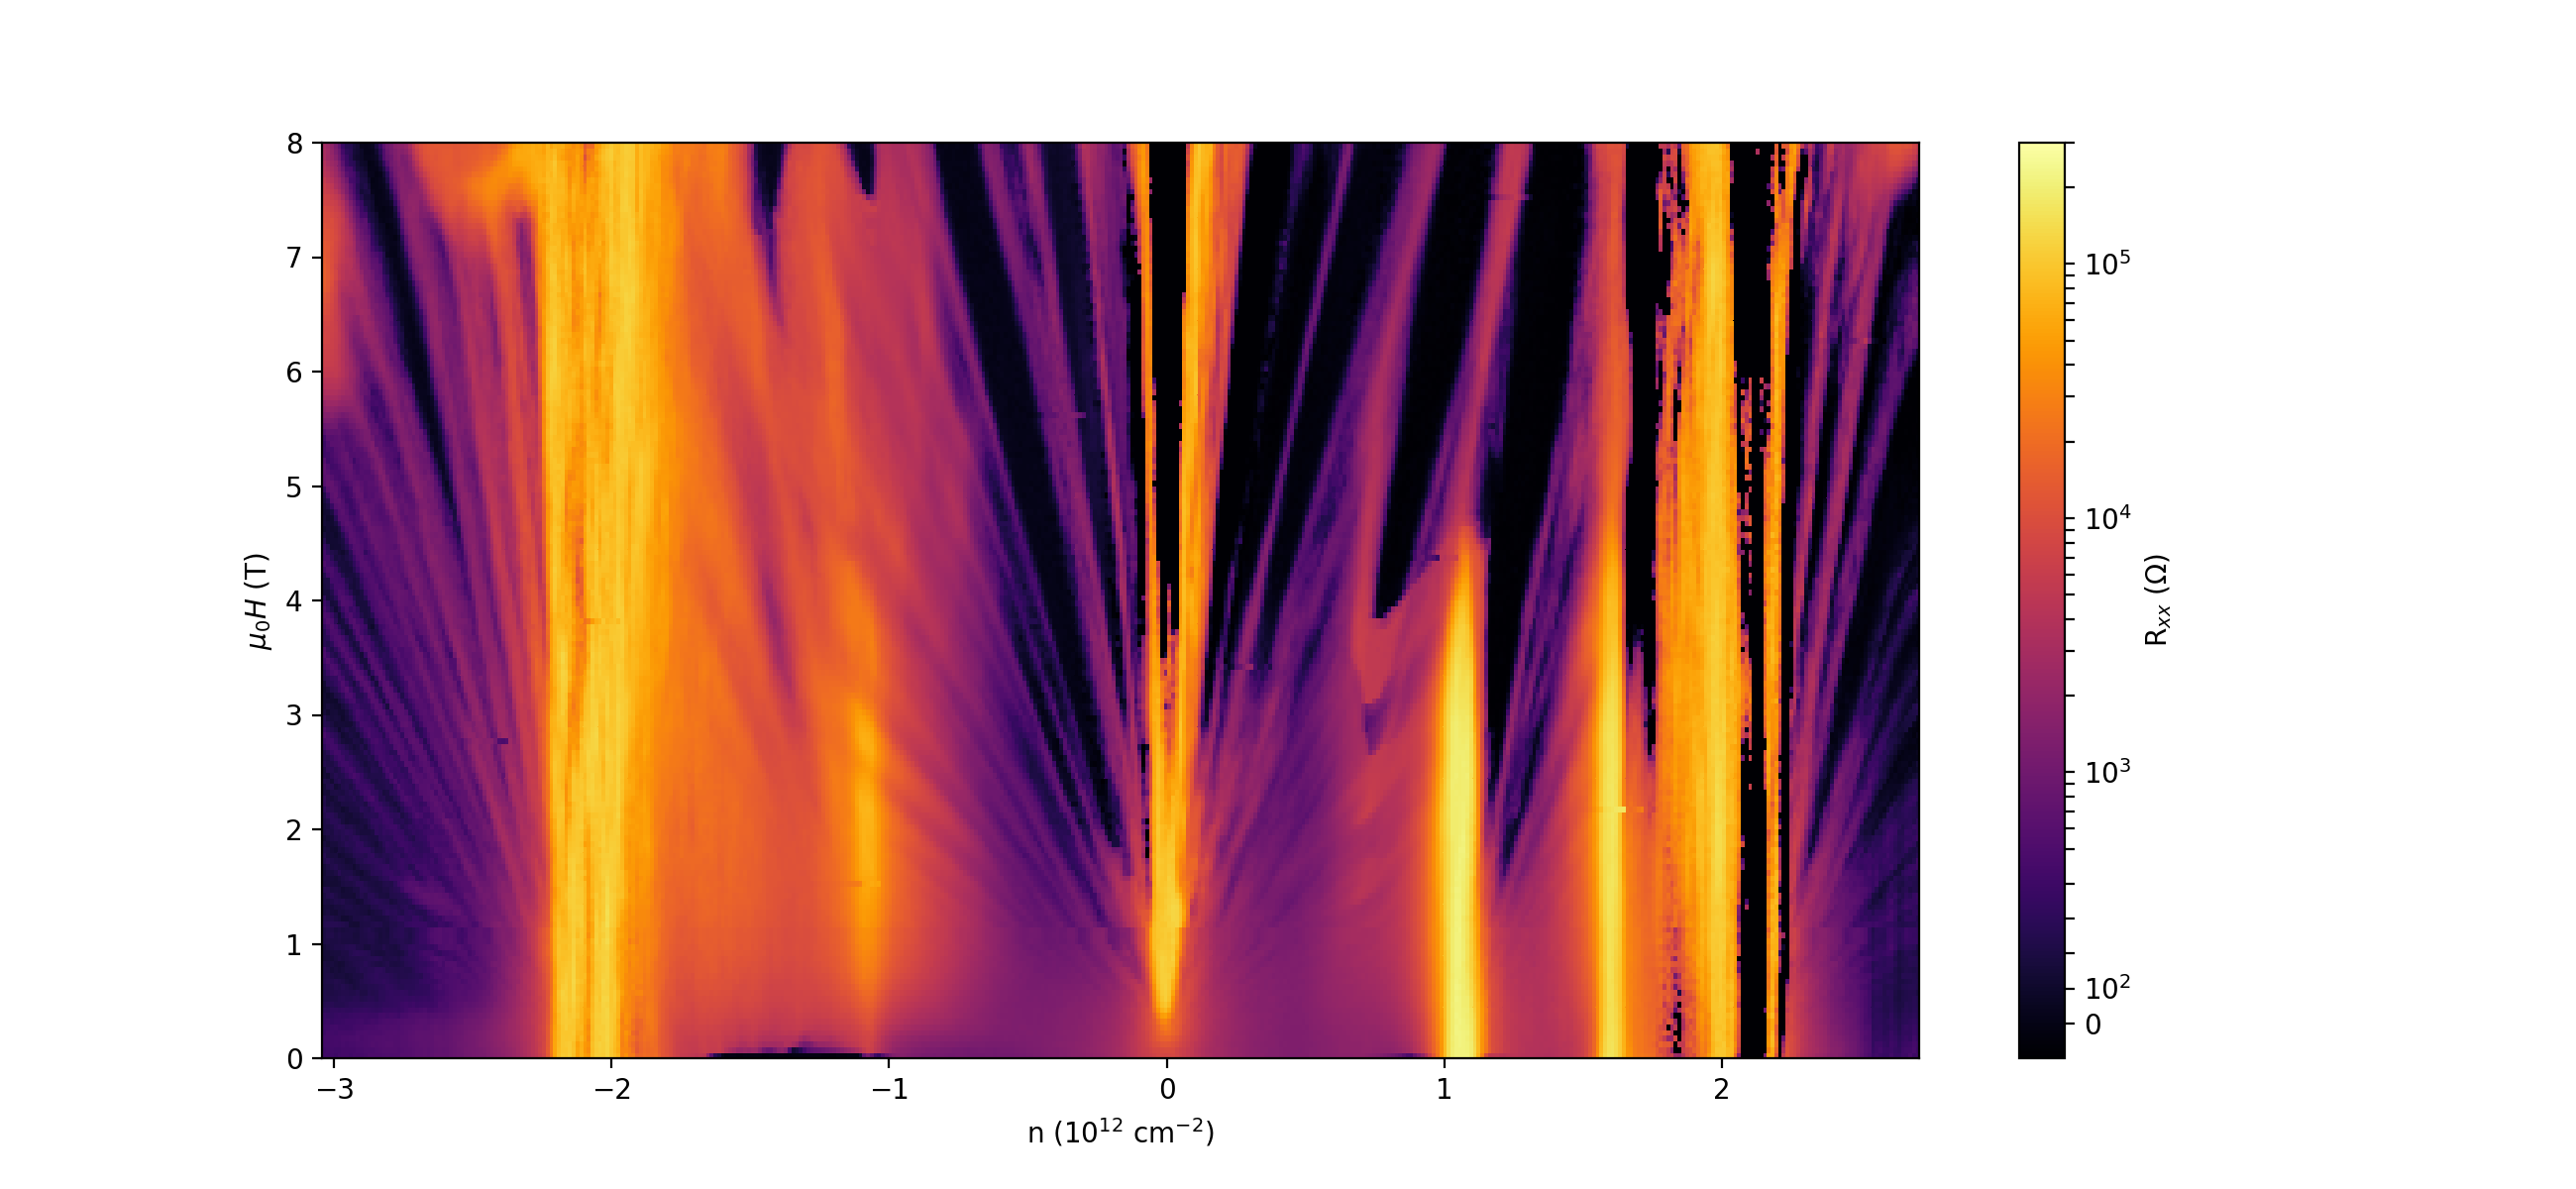

Text(0, 0.5, '$\\mu_0 H$ (T)')

In [244]:
plt.figure(figsize=(13,6))  # artificially cut off max in Rxx
plt.pcolormesh((gfan[11:]-V0)*C/1.602e-19/10**16, fieldsfan, Rxxfan[:, 11:], norm=SymLogNorm(500, vmin=-100, vmax=3e5), cmap='inferno')
plt.colorbar(label='R$_{xx}$ ($\Omega$)')
plt.xlabel('n (10$^{12}$ cm$^{-2}$)')
plt.ylabel('$\mu_0 H$ (T)')
# plt.savefig(figfile+'M08_38-37_FullLandauFan_Rxx', dpi=350)

<IPython.core.display.Javascript object>


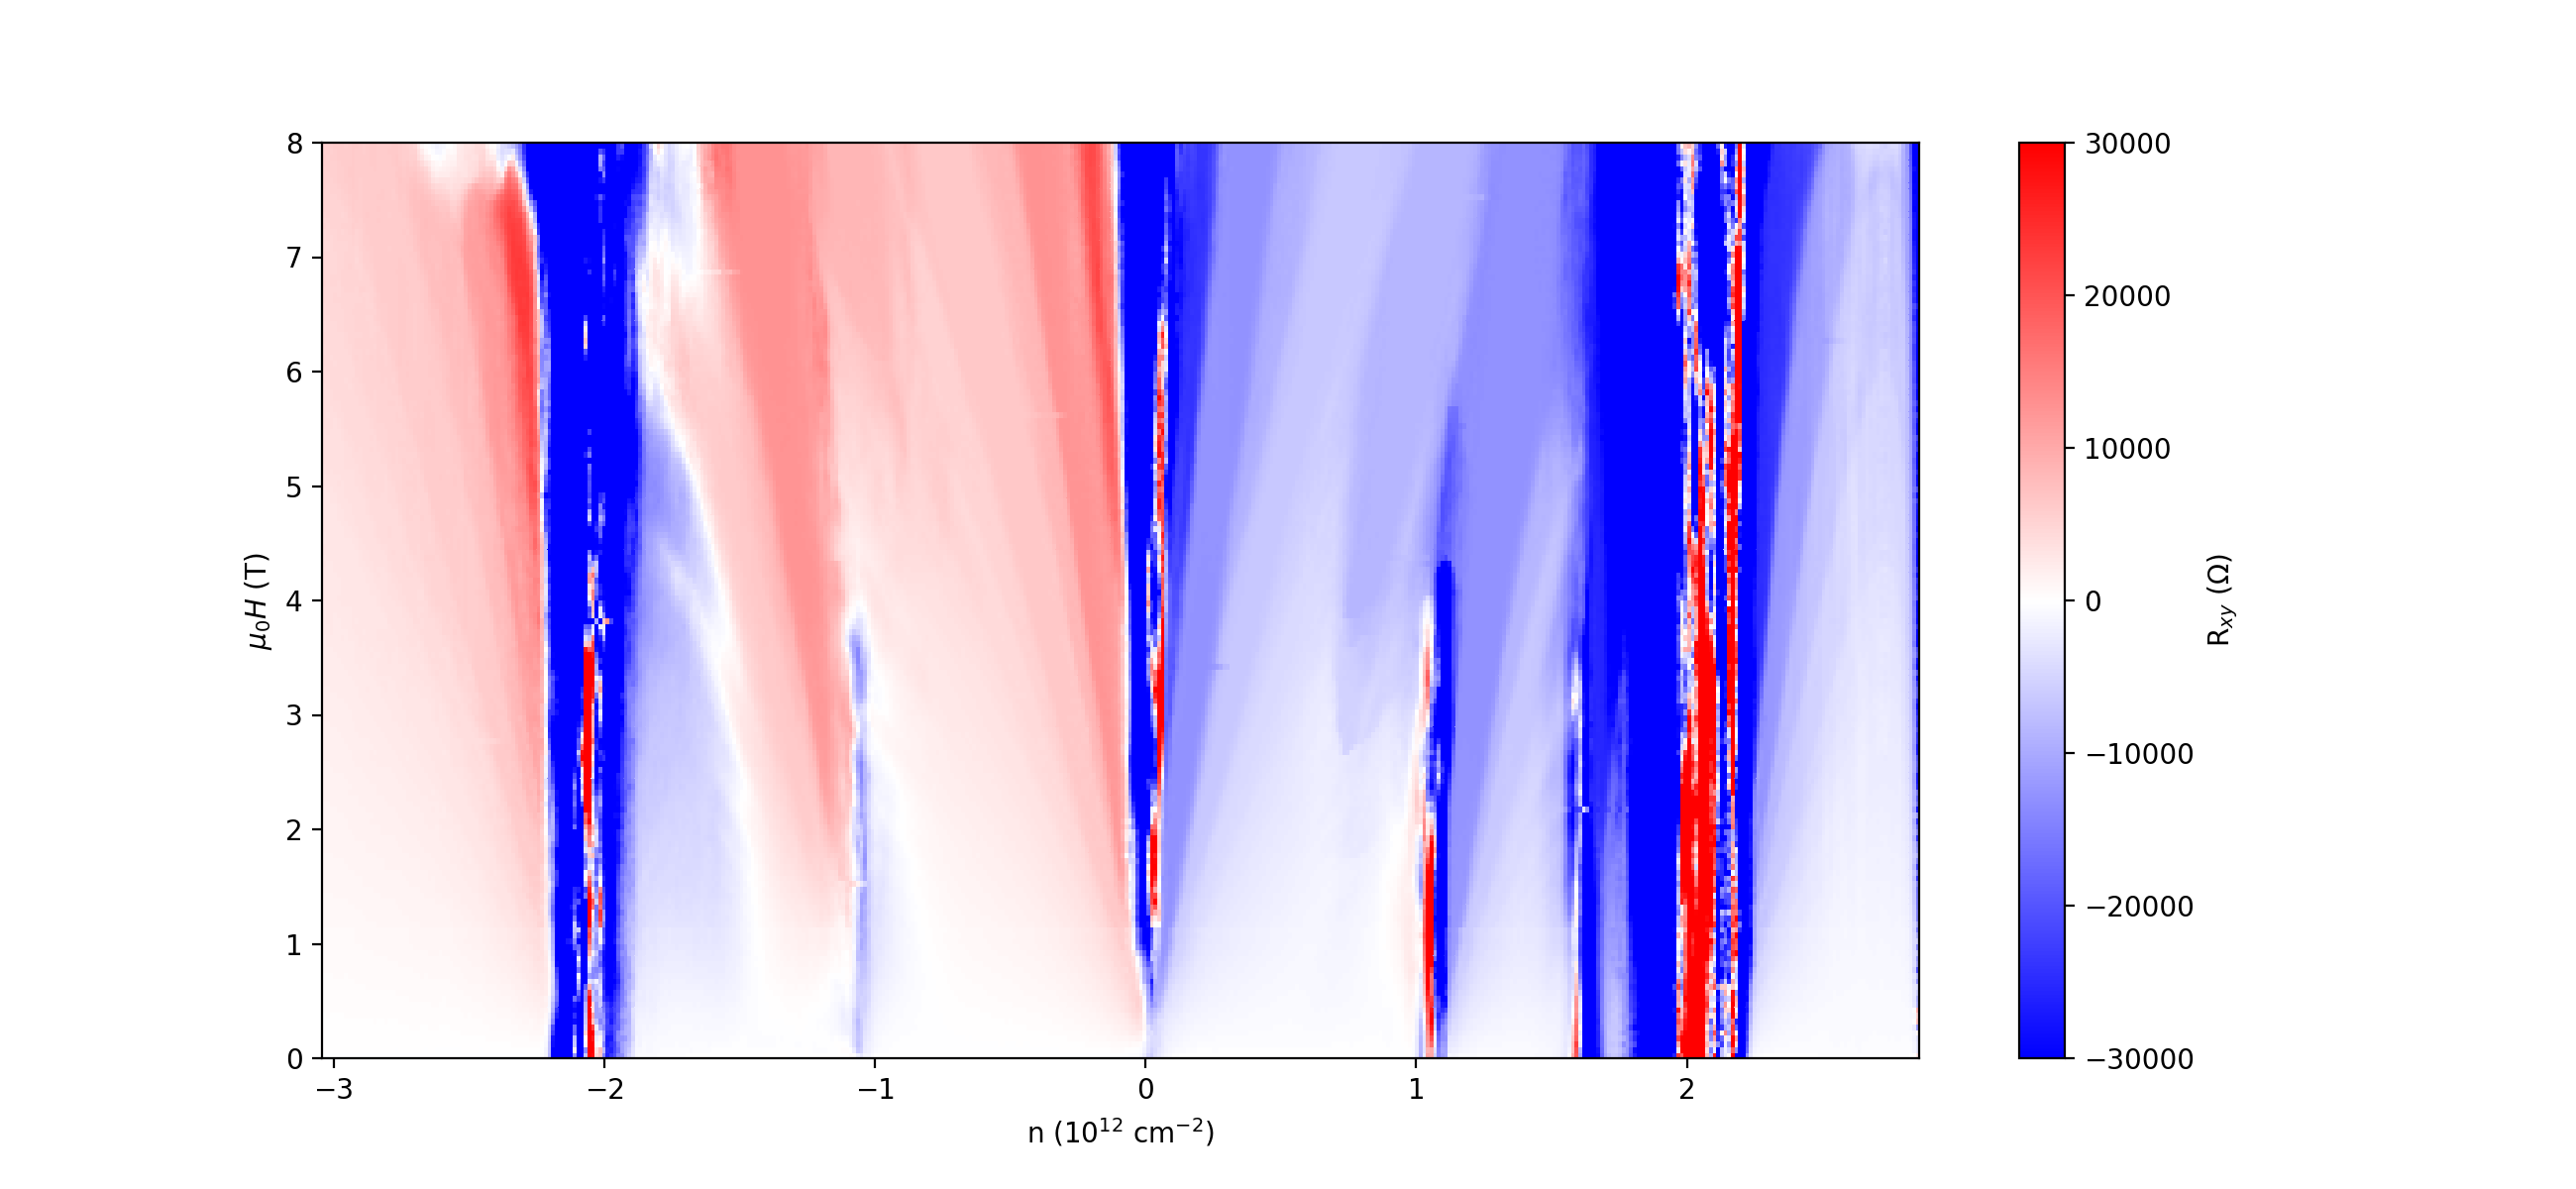

In [90]:
plt.figure(figsize=(13,6))
plt.pcolormesh((gfan-V0)*C/1.602e-19/10**16, fieldsfan, Rxyfan, cmap='bwr', vmin=-3e4, vmax=3e4)
plt.colorbar(label='R$_{xy}$ ($\Omega$)')
plt.xlabel('n (10$^{12}$ cm$^{-2}$)')
plt.ylabel('$\mu_0 H$ (T)')
# plt.savefig(figfile+'M08_38-37_FullLandauFan_Rxy', dpi=350)

<IPython.core.display.Javascript object>


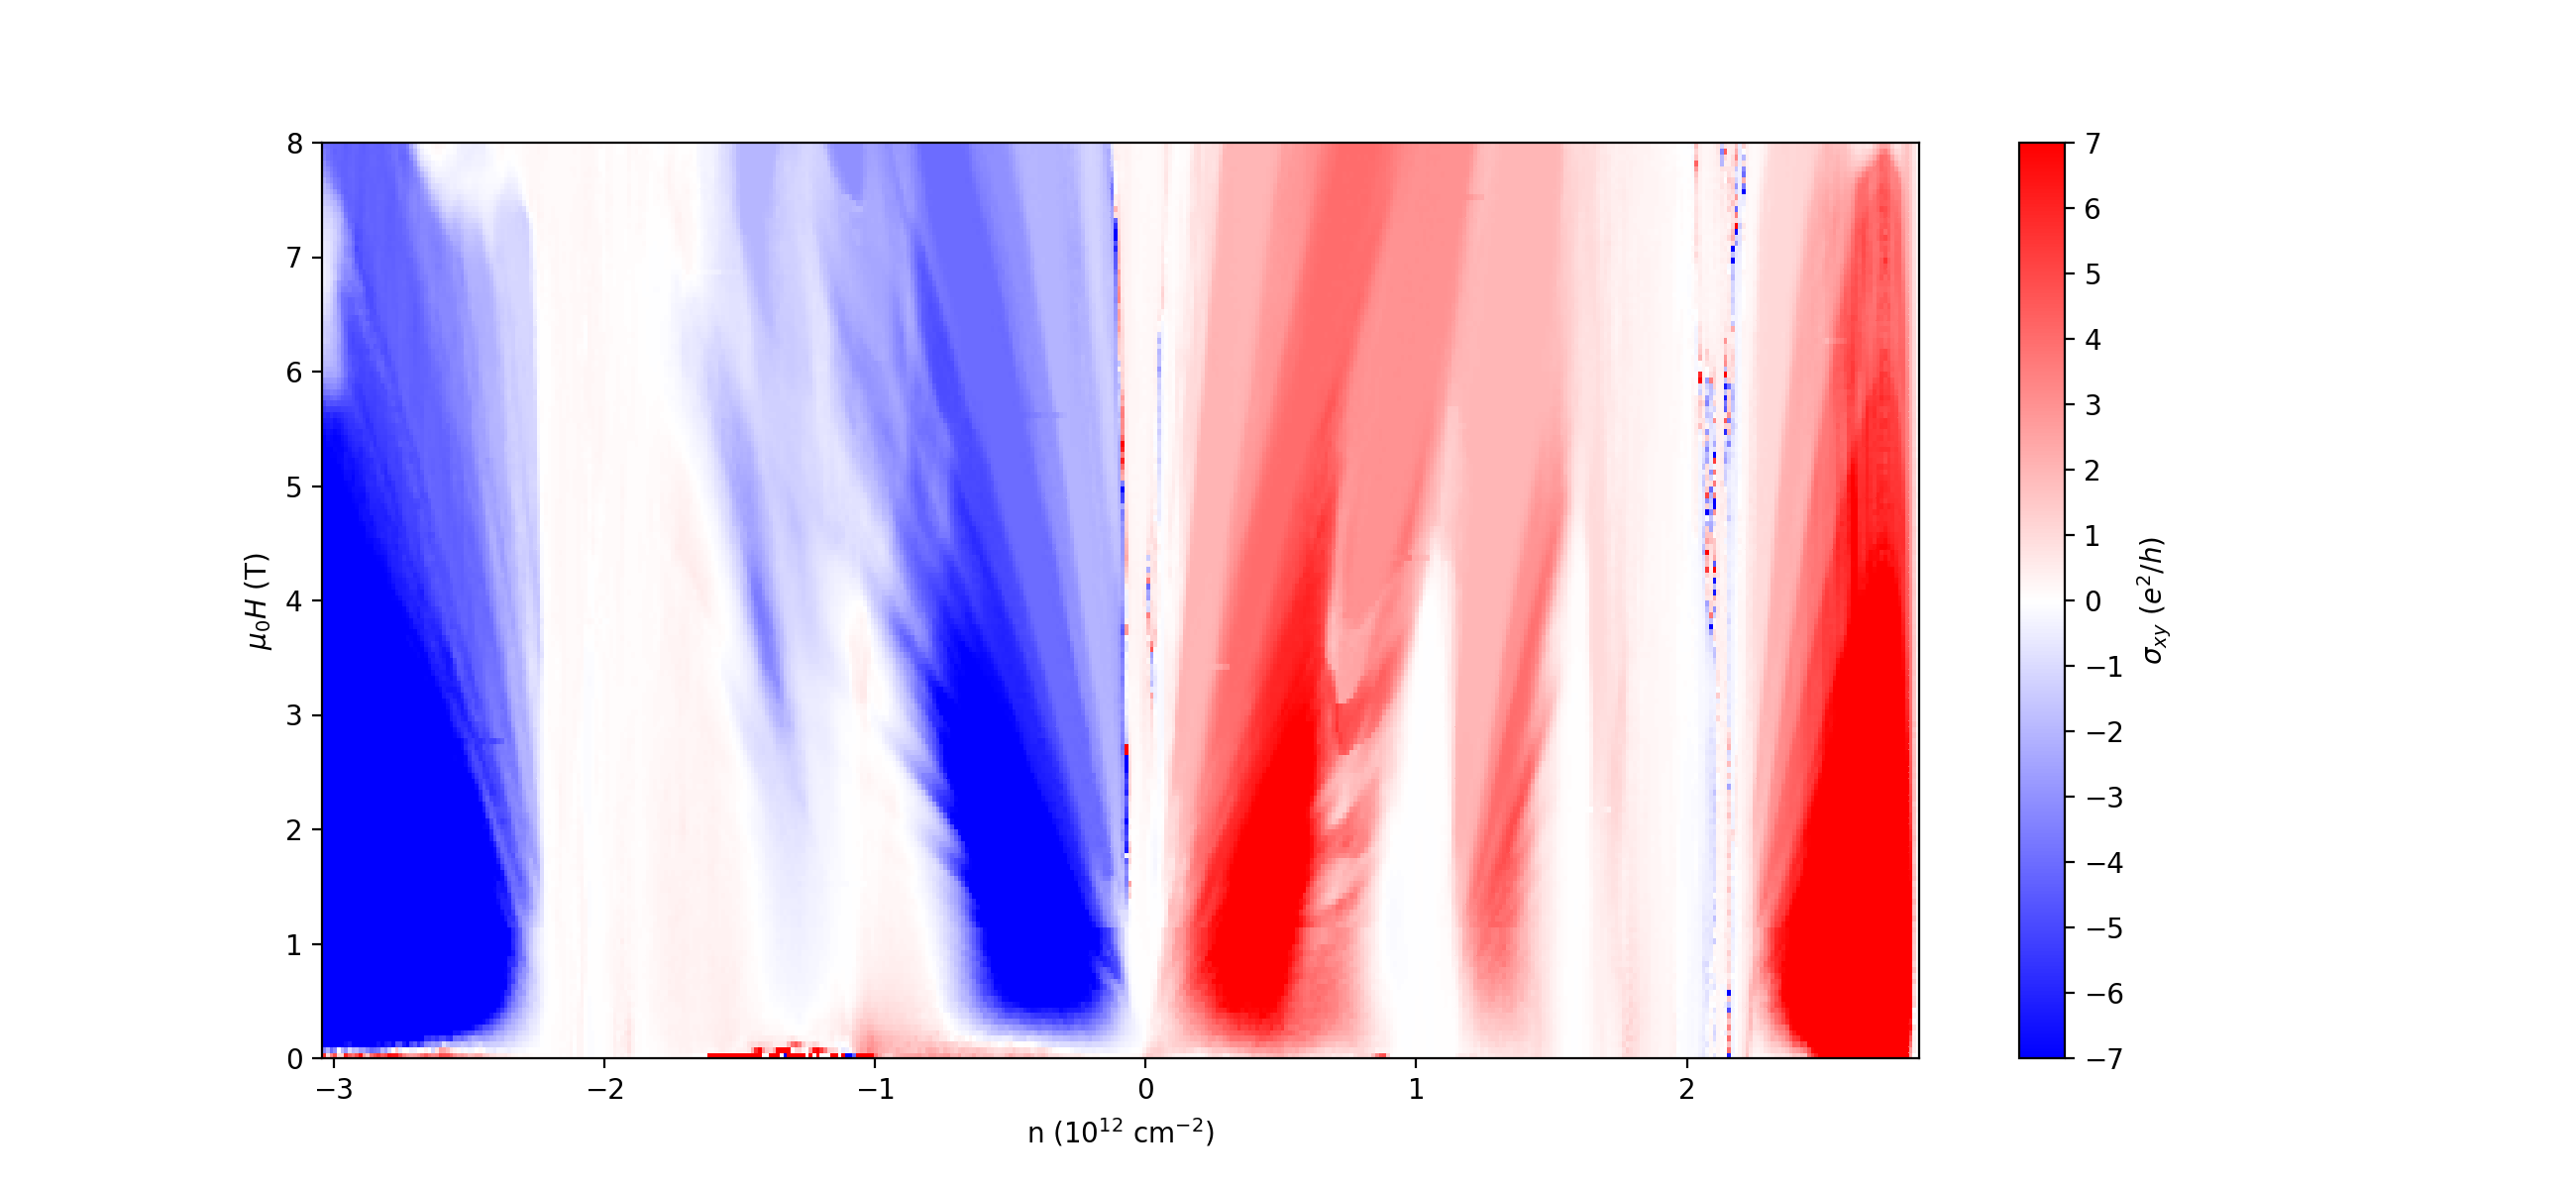

In [93]:
sigmaxy = -Rxyfan/(Rxyfan**2 + Rxxfan**2)
plt.figure(figsize=(13,6))
plt.pcolormesh((gfan-V0)*C/1.602e-19/10**16, fieldsfan, sigmaxy/(1.602e-19**2/6.6e-34), cmap='bwr', vmin=-7, vmax=7)
plt.colorbar(label='$\sigma_{xy}$ ($e^2/h$)', ticks=np.linspace(-7, 7, 15))
plt.xlabel('n (10$^{12}$ cm$^{-2}$)')
plt.ylabel('$\mu_0 H$ (T)')
# plt.savefig(figfile+'M08_38-37_FullLandauFan_Sigmaxy', dpi=350)

<IPython.core.display.Javascript object>


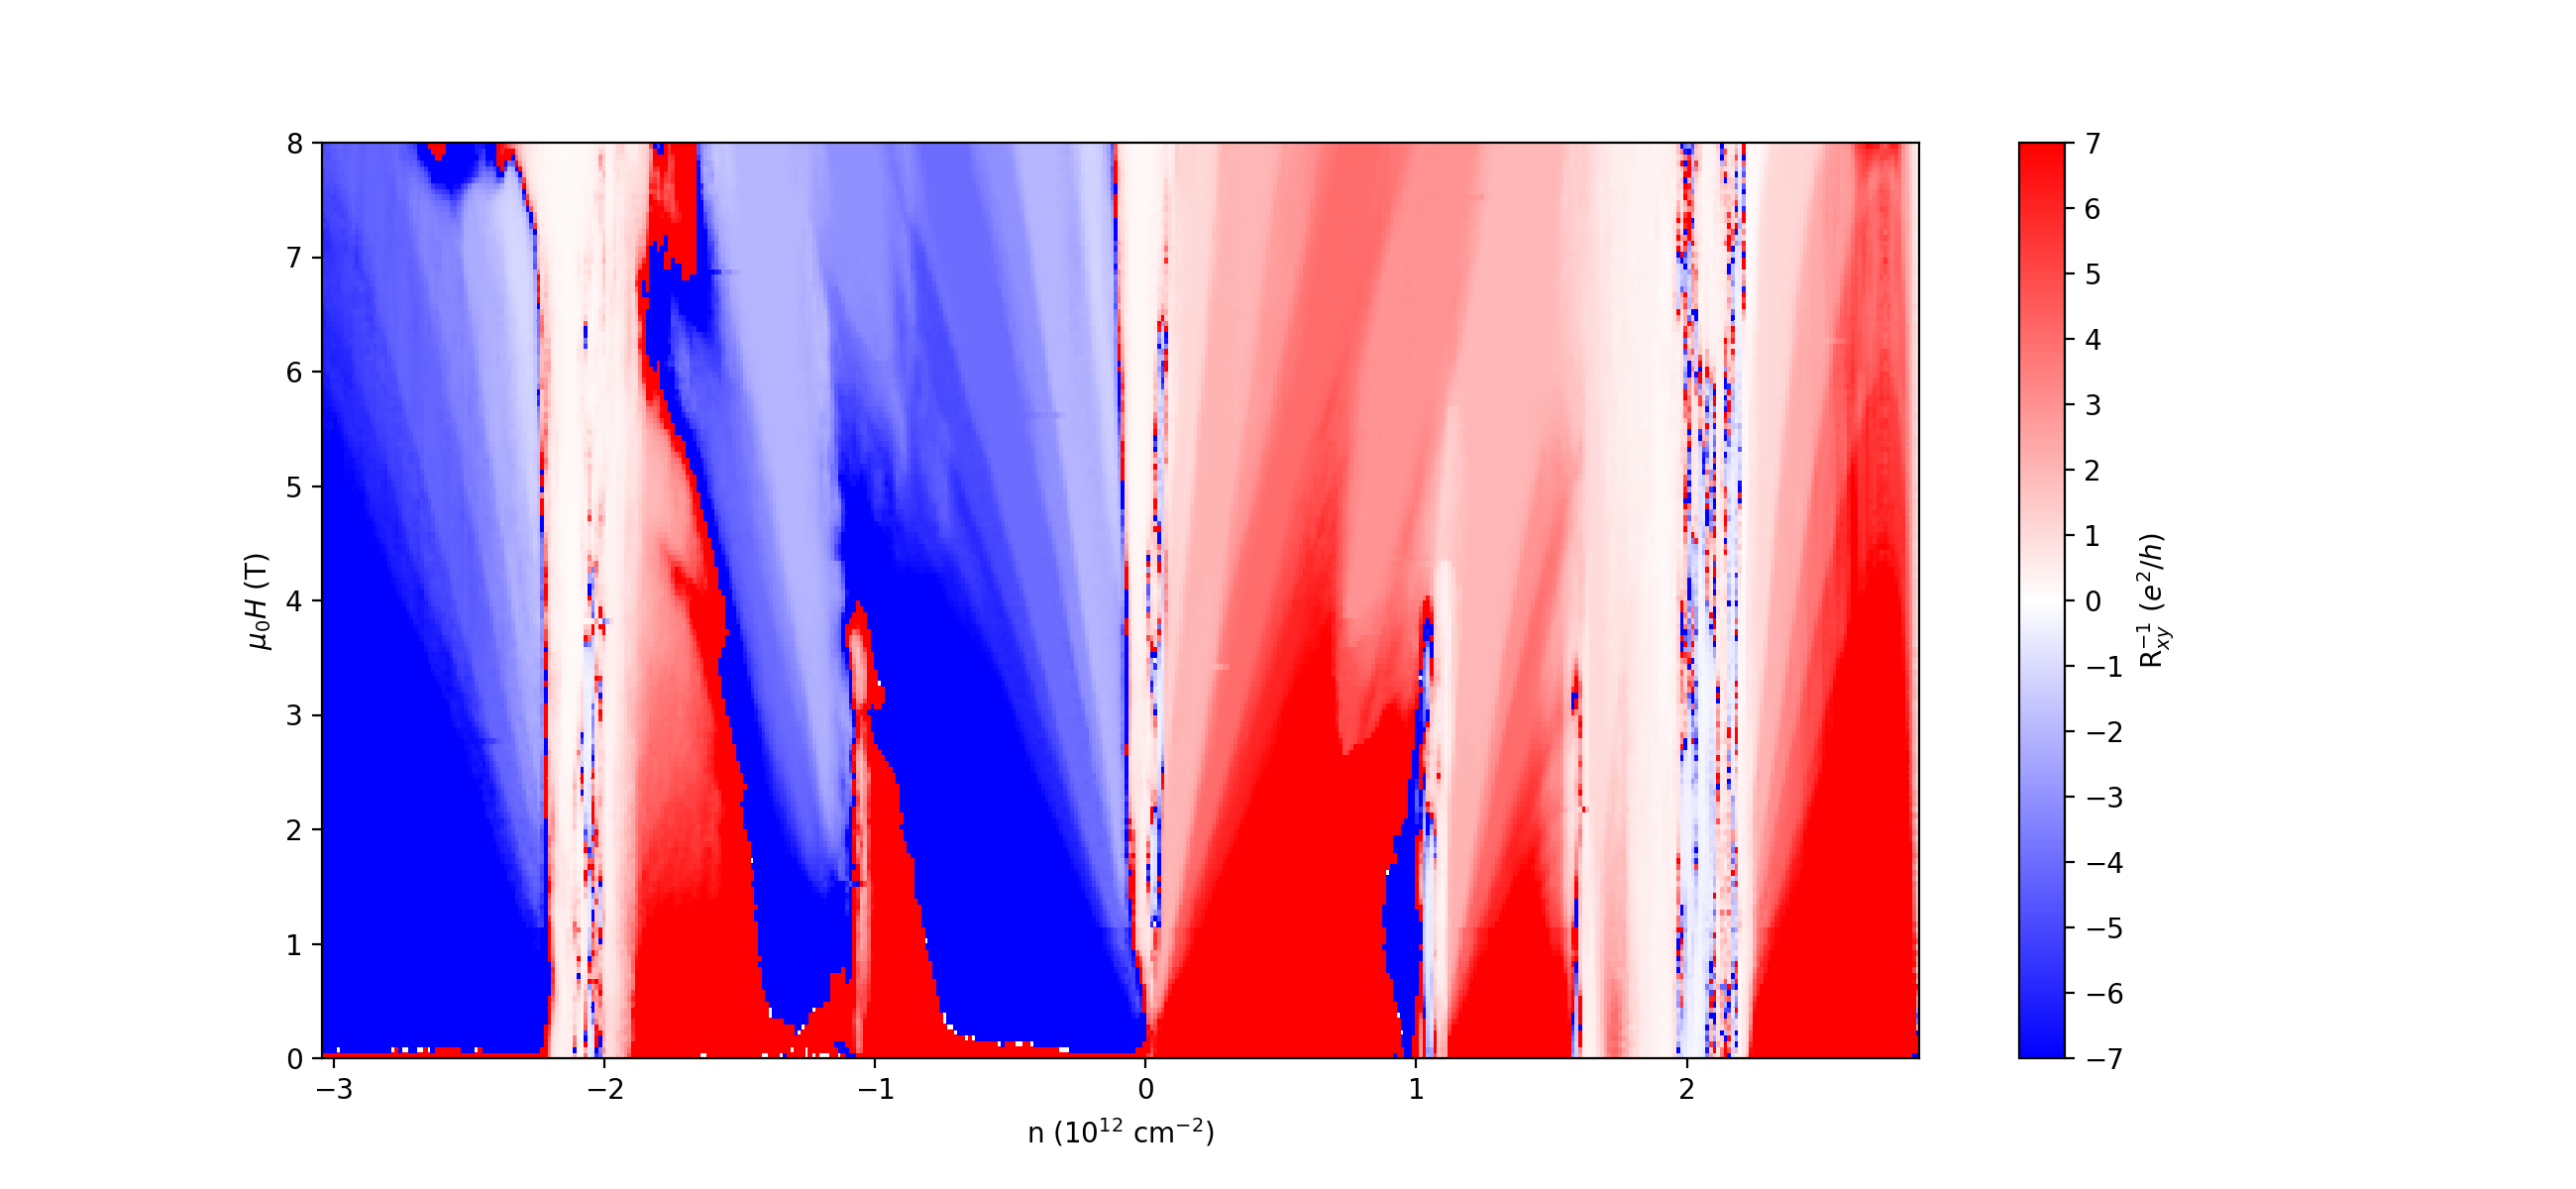

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


In [94]:
plt.figure(figsize=(13,6))
plt.pcolormesh((gfan-V0)*C/1.602e-19/10**16, fieldsfan, -1/Rxyfan/(1.602e-19**2/6.6e-34), cmap='bwr', vmin=-7, vmax=7)
plt.colorbar(label='R$_{xy}^{-1}$ ($e^2/h$)', ticks=np.linspace(-7, 7, 15))
plt.xlabel('n (10$^{12}$ cm$^{-2}$)')
plt.ylabel('$\mu_0 H$ (T)')
# plt.savefig(figfile+'M08_38-37_FullLandauFan_InvRxy', dpi=350)

In [73]:
fieldsfan[140]

7.0

<IPython.core.display.Javascript object>


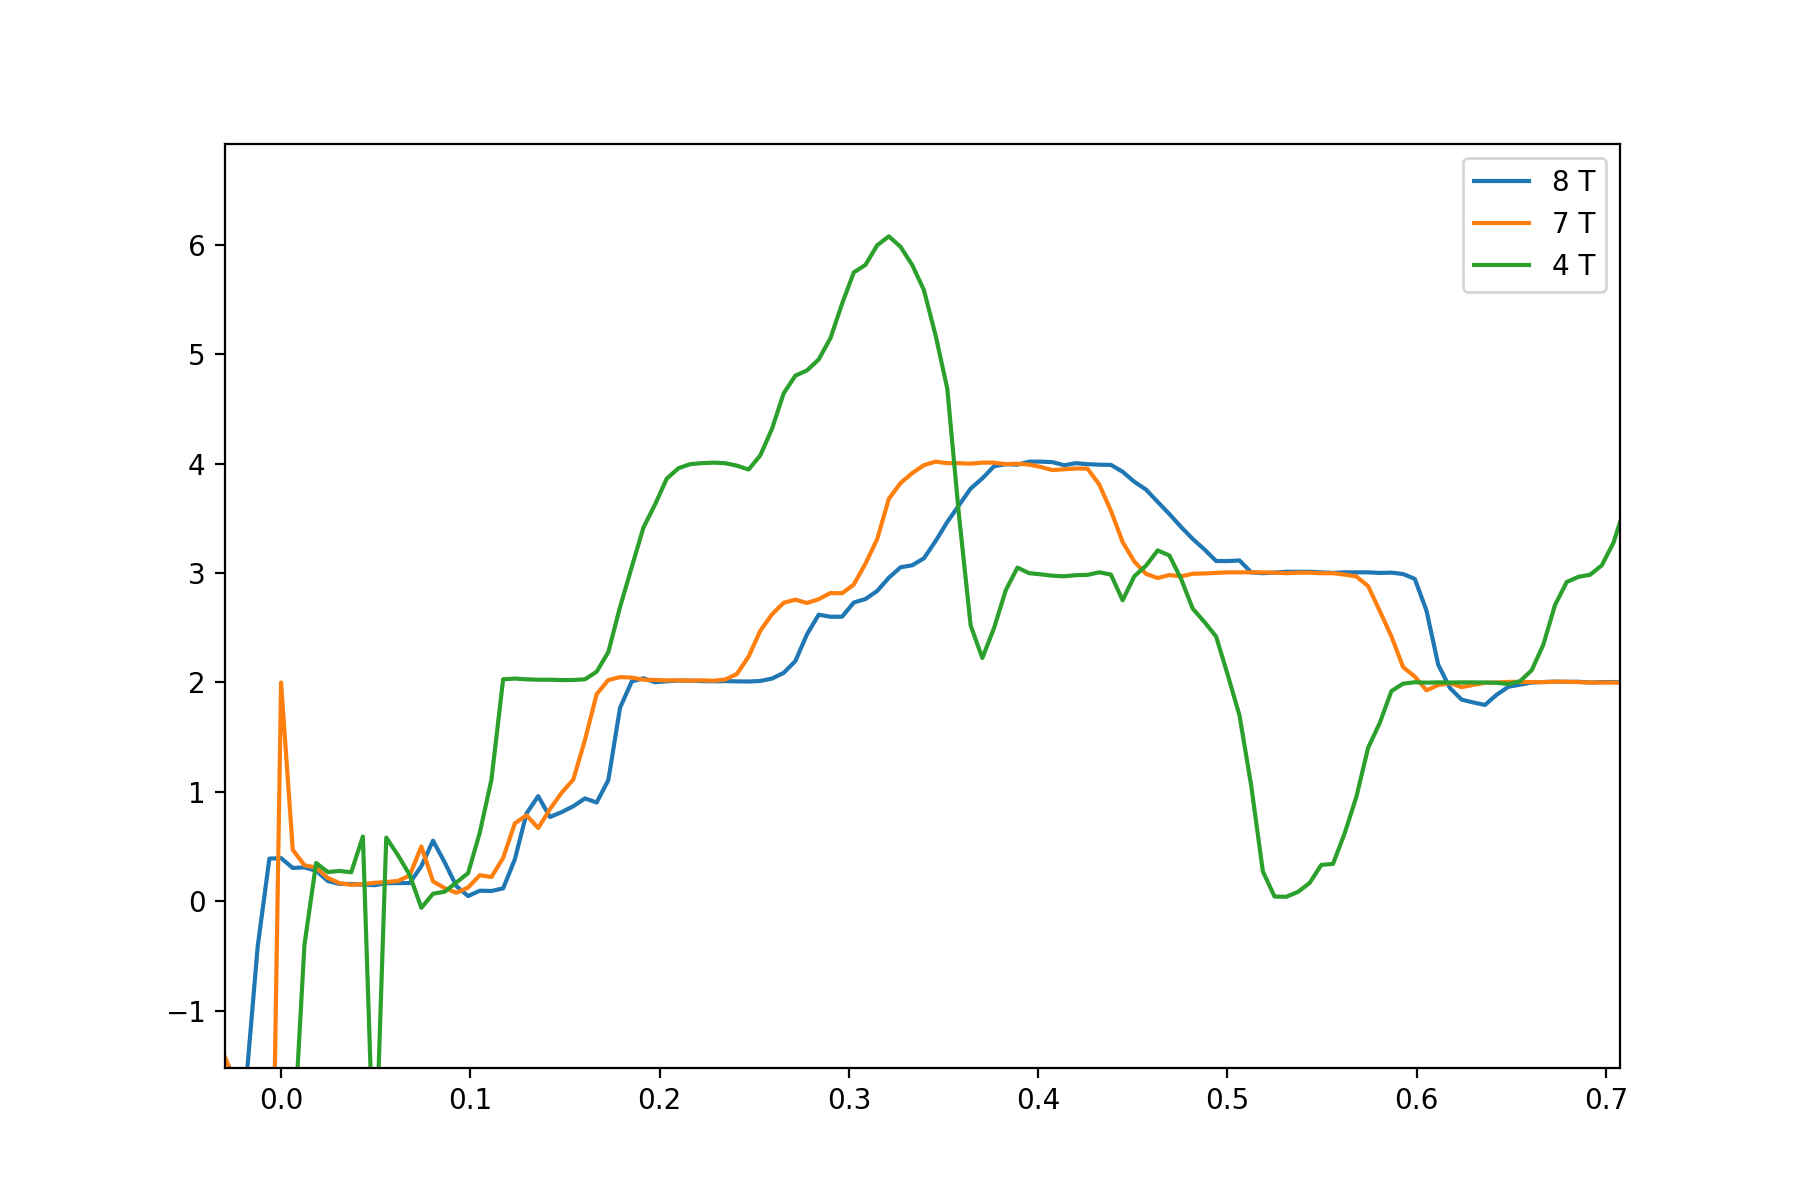

In [243]:
  # 7T cut, 
plt.figure(figsize=(9, 6))
plt.plot(gfan*C/1.602e-19/nfull/10**4, sigmaxy[-1, :]/(1.602e-19**2/6.6e-34), label='8 T')
plt.plot(gfan*C/1.602e-19/nfull/10**4, sigmaxy[140, :]/(1.602e-19**2/6.6e-34), label='7 T')
plt.plot(gfan*C/1.602e-19/nfull/10**4, sigmaxy[80, :]/(1.602e-19**2/6.6e-34), label='4 T')
plt.legend()

Temperature dependence

In [194]:
Tdata = qc.load_data('data/2019-10-10/#006_M08_-.8mT_0.2nA_T-bgtwod_11-08-50')
Tdata

DataSet:
   location = 'data/2019-10-10/#006_M08_-.8mT_0.2nA_T-bgtwod_11-08-50'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (30,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (30, 401)
   Measured | lockin830_X             | X            | (30, 401)
   Measured | lockin830_Y             | Y            | (30, 401)
   Measured | lockin865_X             | X            | (30, 401)
   Measured | lockin865_Y             | Y            | (30, 401)

In [177]:
baseTdata = qc.load_data('data/2019-10-10/#003_M08_38-37_basetemp_-.08mT_0.2nA_09-02-47')

In [178]:
baseTdata

DataSet:
   location = 'data/2019-10-10/#003_M08_38-37_basetemp_-.08mT_0.2nA_09-02-47'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)

In [196]:
Tdata.triton_pid_setpoint_set

DataArray[30]: triton_pid_setpoint_set
array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [199]:
T = np.concatenate(([0.025], Tdata.triton_pid_setpoint_set[:20]))
Tgates = Tdata.srframe_volt_p1_set[0, :]
R3837 = np.vstack((baseTdata.lockin865_X[:], Tdata.lockin865_X[:20, :]))/0.2e-9

In [200]:
T

array([0.025, 0.05 , 0.1  , 0.15 , 0.2  , 0.25 , 0.3  , 0.35 , 0.4  ,
       0.45 , 0.5  , 0.55 , 0.6  , 0.65 , 0.7  , 0.75 , 0.8  , 0.85 ,
       0.9  , 0.95 , 1.   ])

In [201]:
R3837

array([[3613.91812475,  742.1067494 ,  519.0833008 , ...,  704.6222805 ,
         688.52365585,  529.4023353 ],
       [ 430.82948764,  455.77536411,  398.41584254, ...,  637.44280965,
         603.3619826 ,  451.84268771],
       [ 464.48747071,  406.41445765,  471.71290873, ...,  643.8809663 ,
         654.3101705 ,  487.5398929 ],
       ...,
       [ 473.3828618 ,  449.06439456,  492.82188997, ..., 1048.1691959 ,
         906.67583665,  851.93939015],
       [ 445.74576918,  479.60618587,  503.0272021 , ..., 1079.0260063 ,
         980.81081035,  844.56267755],
       [ 498.40249261,  500.57451515,  483.27148505, ..., 1044.4598786 ,
         950.4065446 ,  871.80104915]])

In [110]:
T

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

<IPython.core.display.Javascript object>


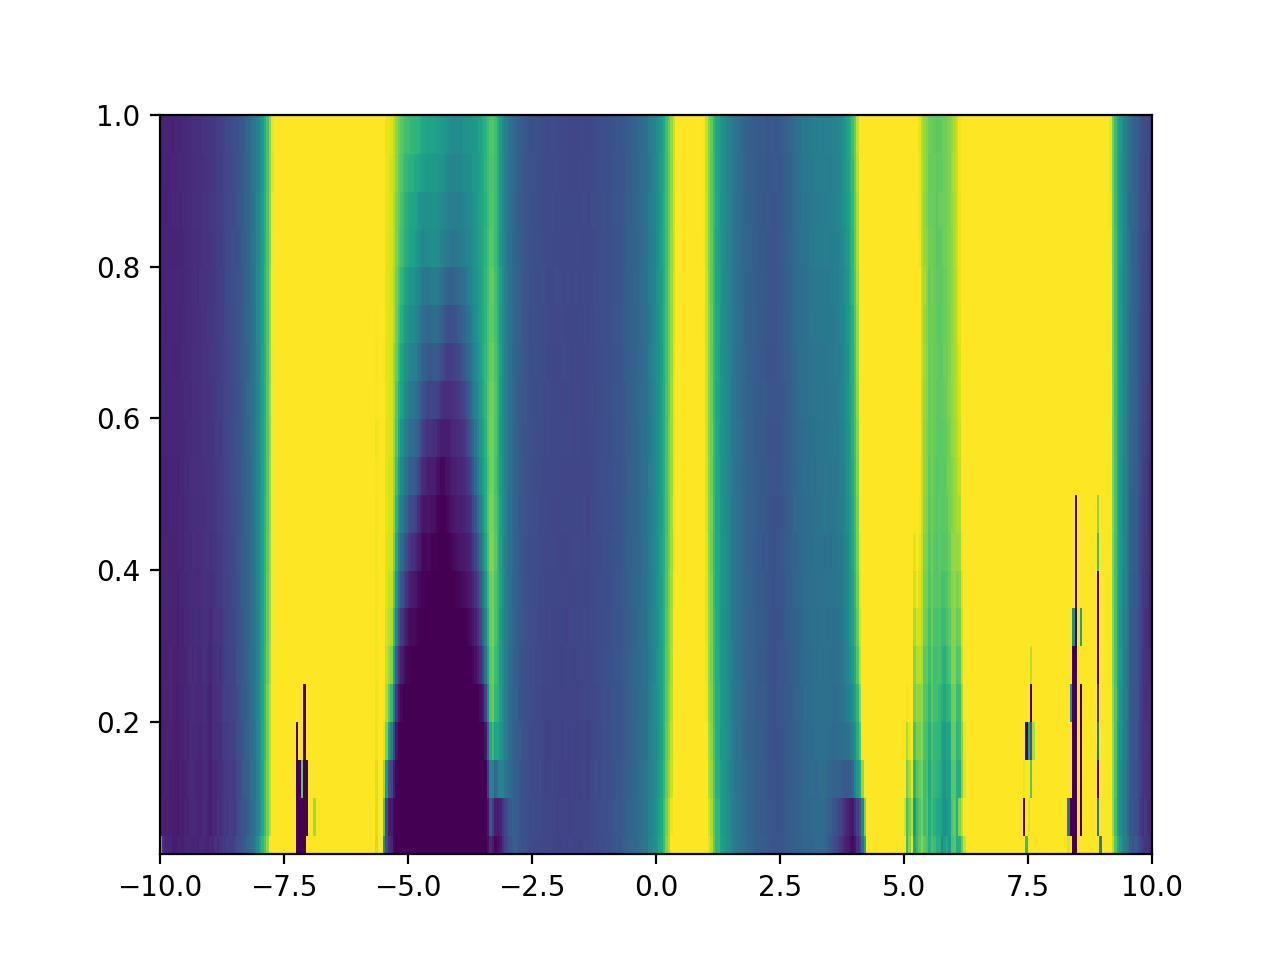

In [203]:
plt.figure()
plt.pcolormesh(Tgates, T, R3837, vmax=5000, vmin=0)

Hole Pocket

<IPython.core.display.Javascript object>


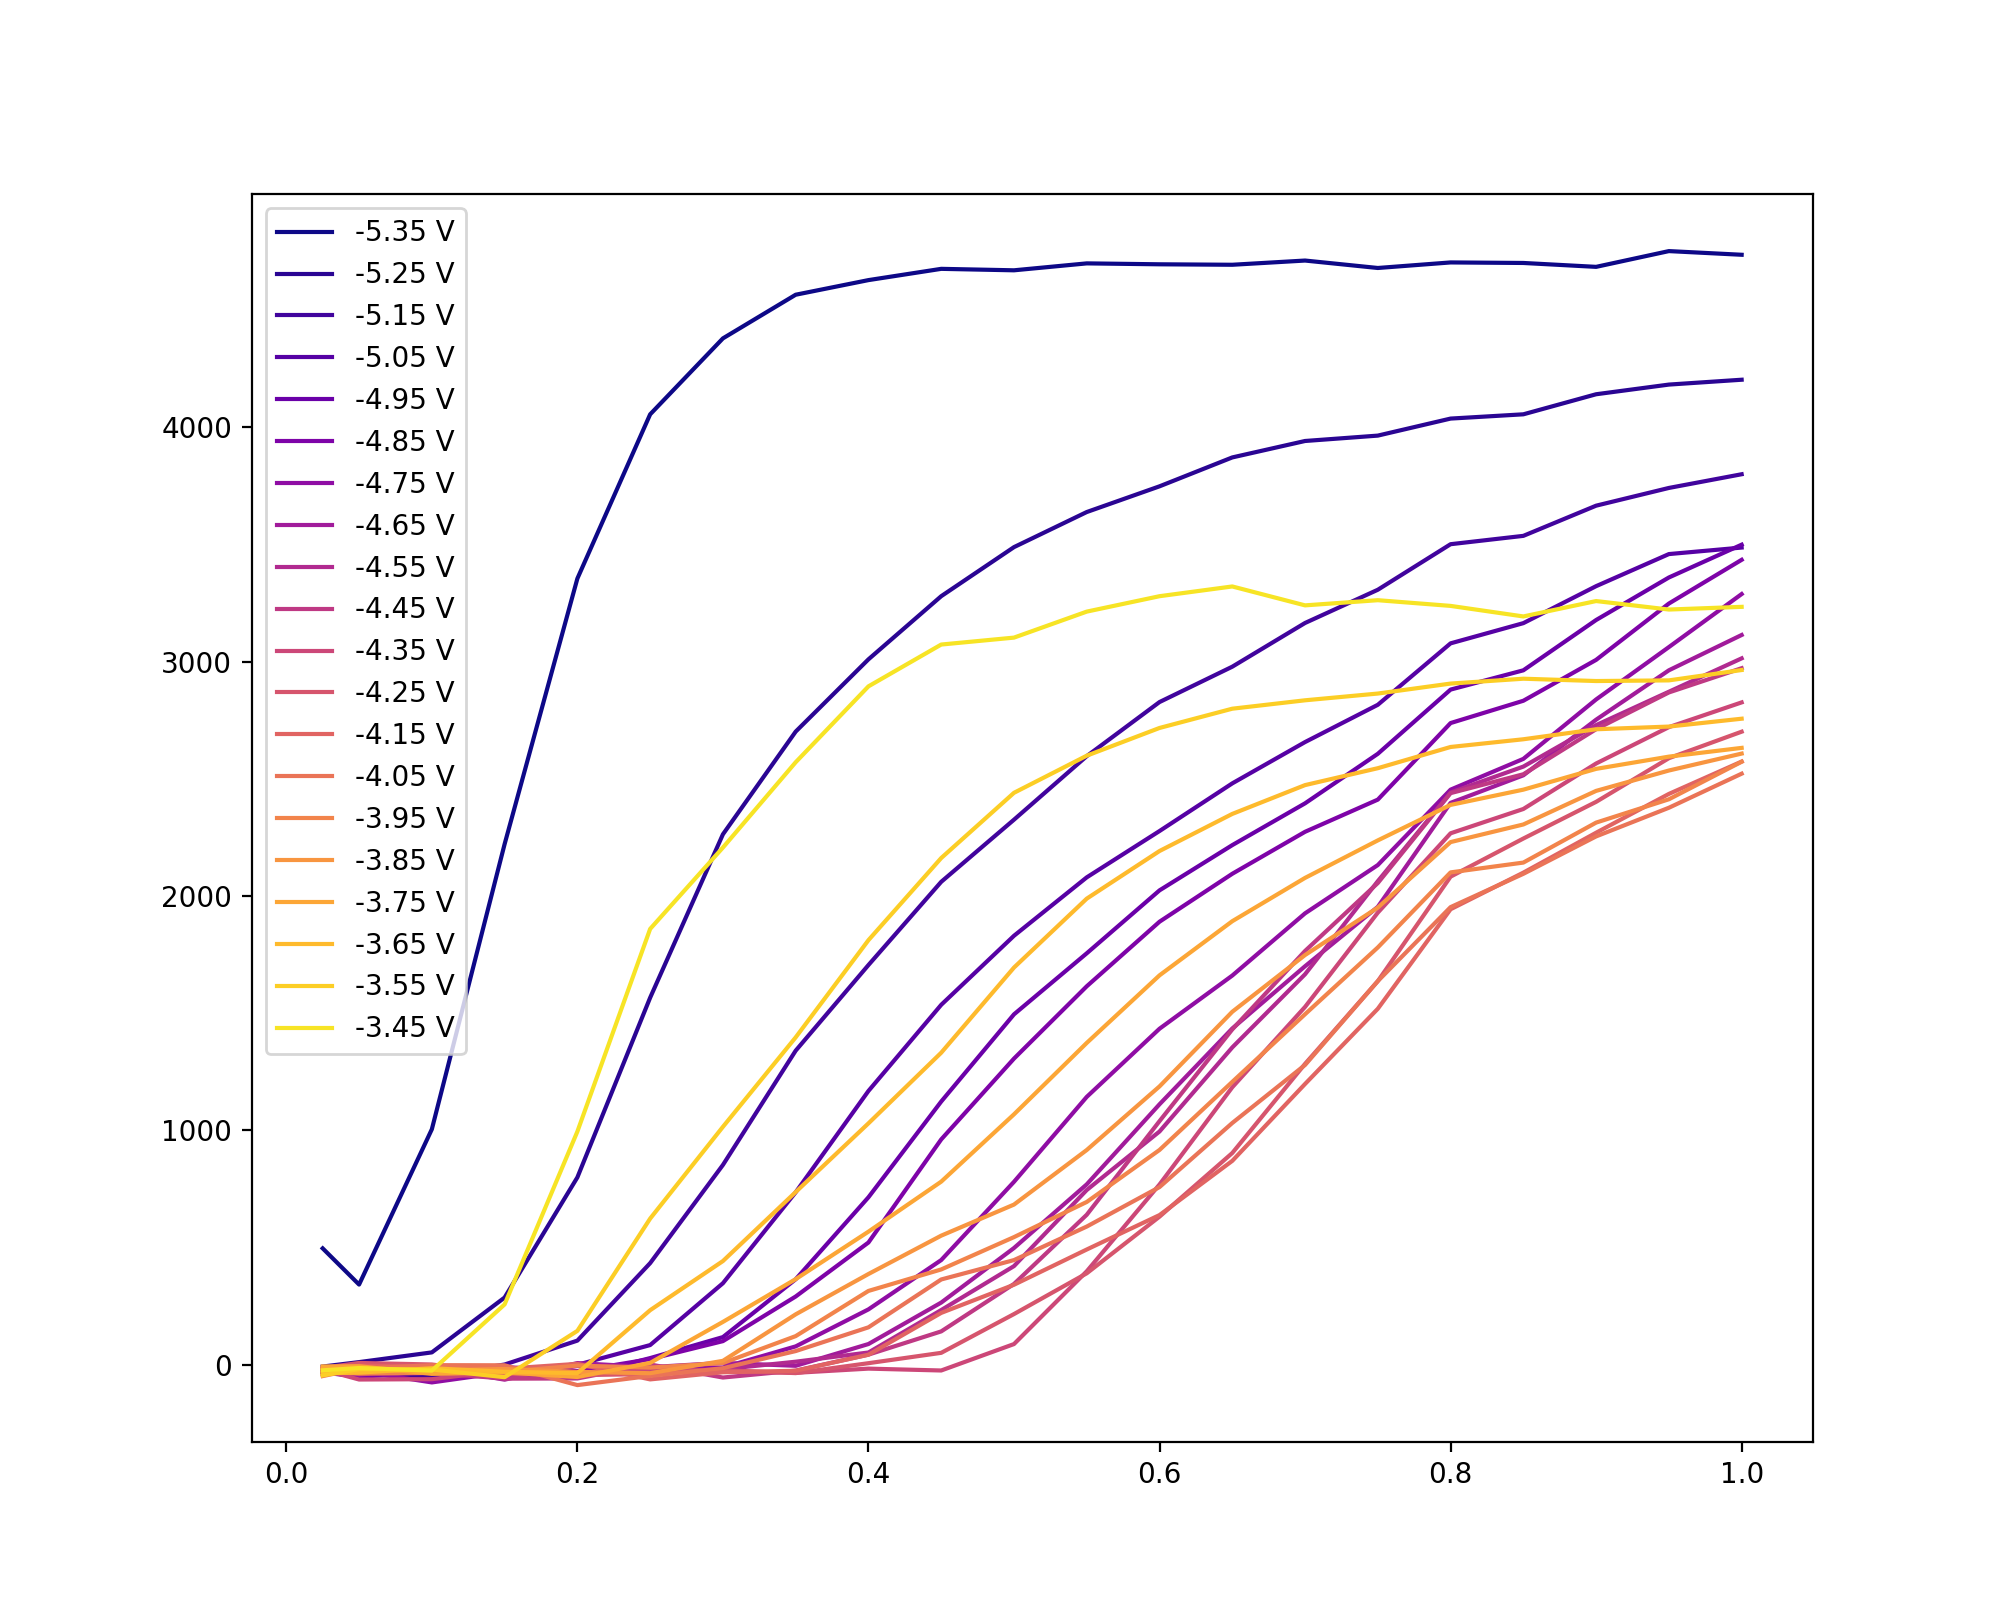

In [204]:
N = 20
cs = plt.get_cmap('plasma')([i/N for i in range(N)])
plt.figure()
for i in range(N):
    gv = 93 + 2*i
    plt.plot(T, R3837[:, gv], color=cs[i], label='{} V'.format(Tgates[gv]))
    
plt.legend()

Now 2-10K

In [207]:
dHT2 = qc.load_data('data/2019-10-11/#001_M08_-.8mT_0.2nA_T-bgtwod_7p2to10K_08-58-32')
dHT1 = qc.load_data('data/2019-10-10/#007_M08_-.8mT_0.2nA_T-bgtwod_3to10K_17-35-51')  #actually 2-10K

In [213]:
dHT1.triton_pid_setpoint_set[50]  #last full temp data point

7.0

In [230]:
R3837_h1 = dHT1.lockin865_X[:51, :]/0.2e-9
hT1 = dHT1.triton_pid_setpoint_set[:51]
Tgates = dHT1.srframe_volt_p1_set[0, :]

R3837_h2 = dHT2.lockin865_X[:, :]/0.2e-9
hT2 = dHT2.triton_pid_setpoint_set[:]

<IPython.core.display.Javascript object>


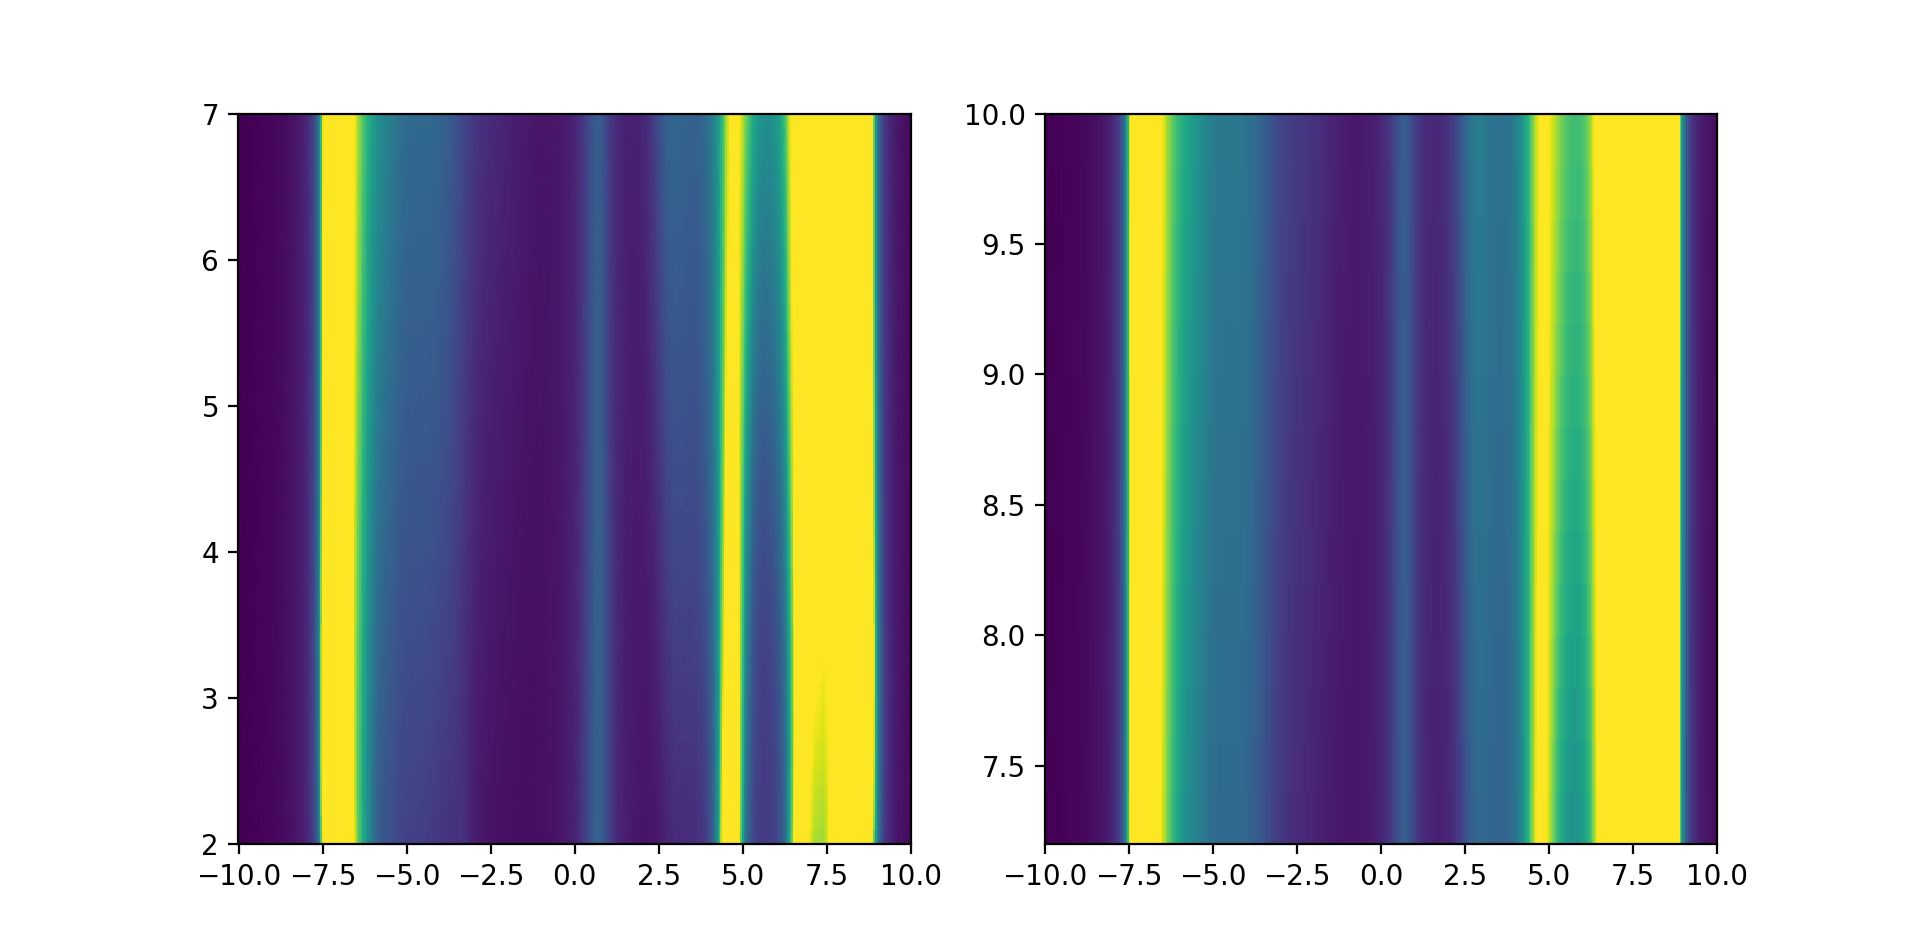

In [232]:
fig, ax = plt.subplots(1, 2)
ax[0].pcolormesh(Tgates, hT1, R3837_h1, vmax=20000)
ax[1].pcolormesh(Tgates, hT2, R3837_h2, vmax=20000)

<IPython.core.display.Javascript object>


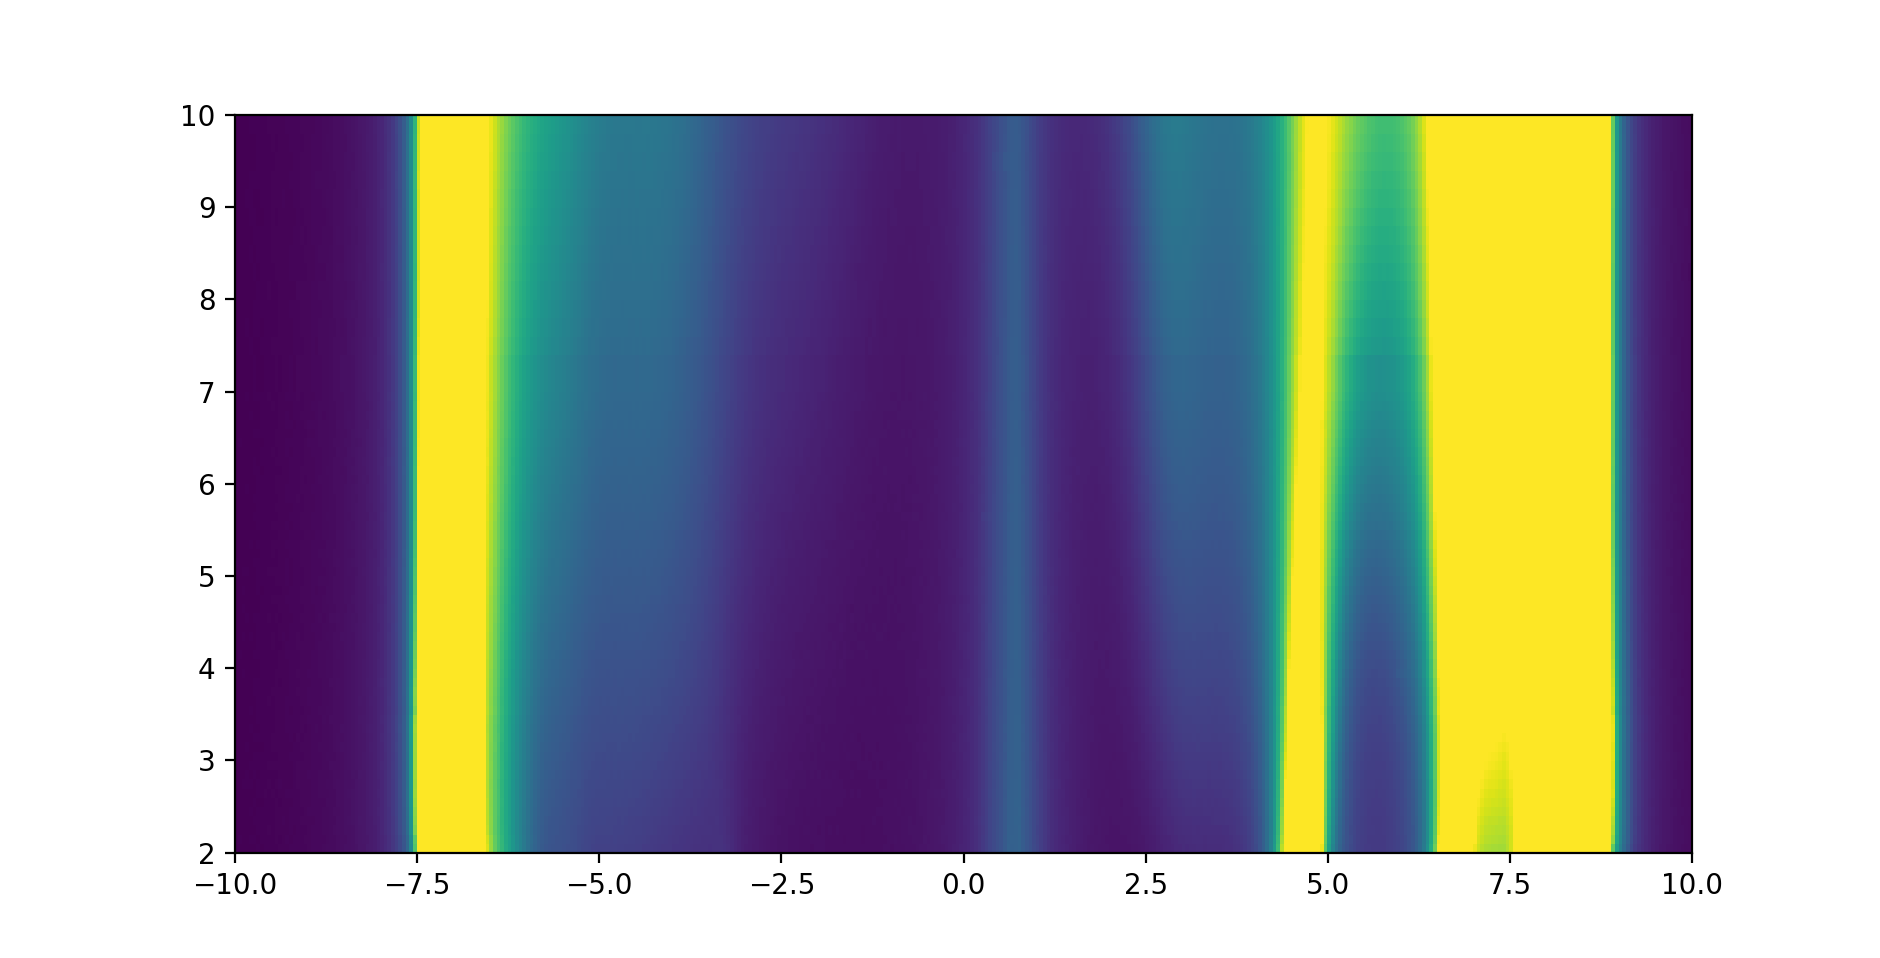

In [233]:
# combine them

R3837_H = np.vstack((R3837_h1, R3837_h2[1:, :]))
hT = np.concatenate((hT1, hT2[1:]))

plt.figure()
plt.pcolormesh(Tgates, hT, R3837_H, vmax=20000)

<IPython.core.display.Javascript object>


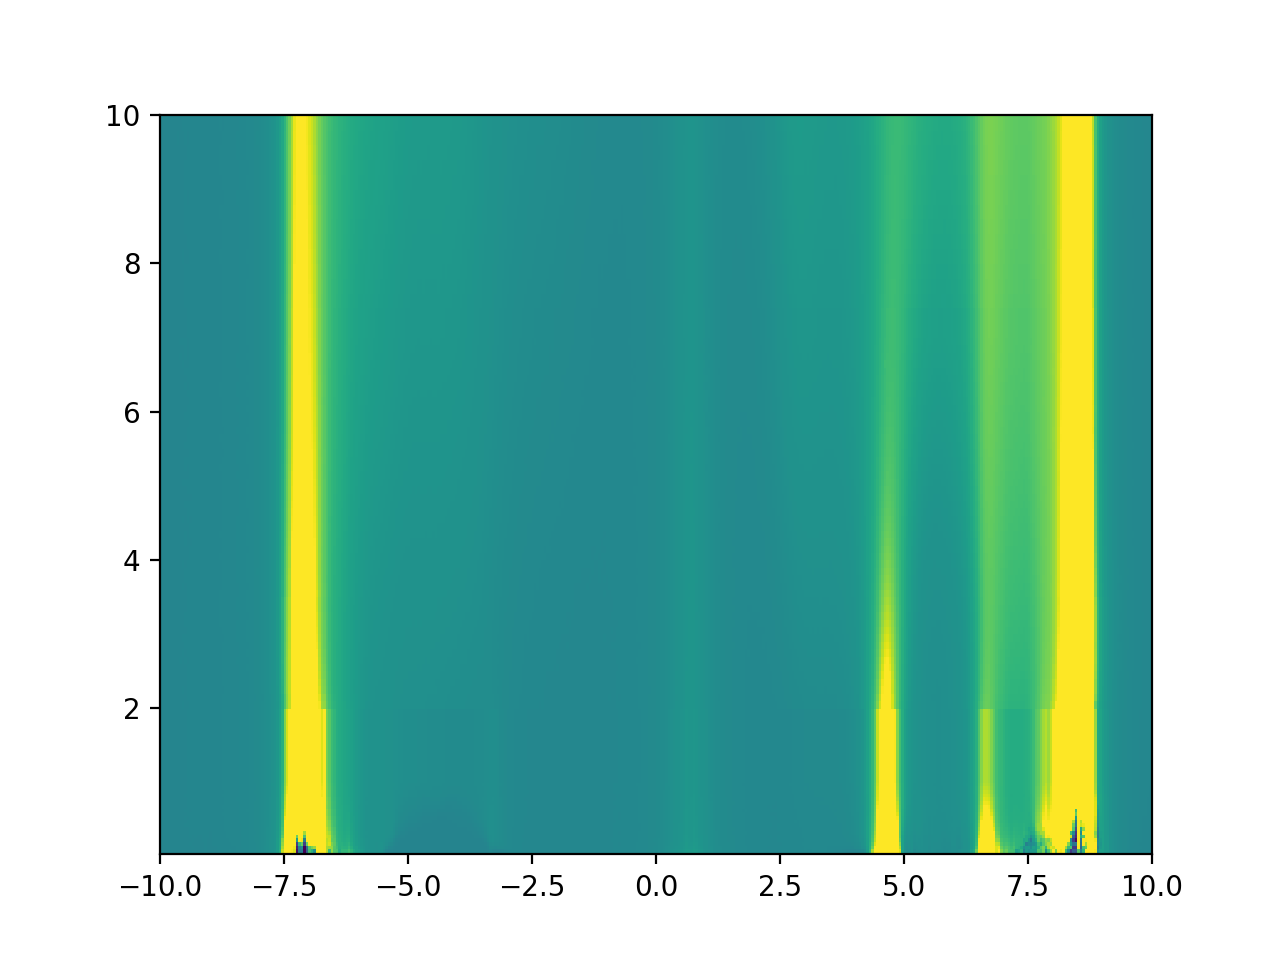

In [238]:
# Combine with the low-temp data
R3837_all = np.vstack((R3837, R3837_H))
Tall = np.concatenate((T, hT))

plt.figure()
plt.pcolormesh(Tgates, Tall, R3837_all, vmax=50000)

<IPython.core.display.Javascript object>


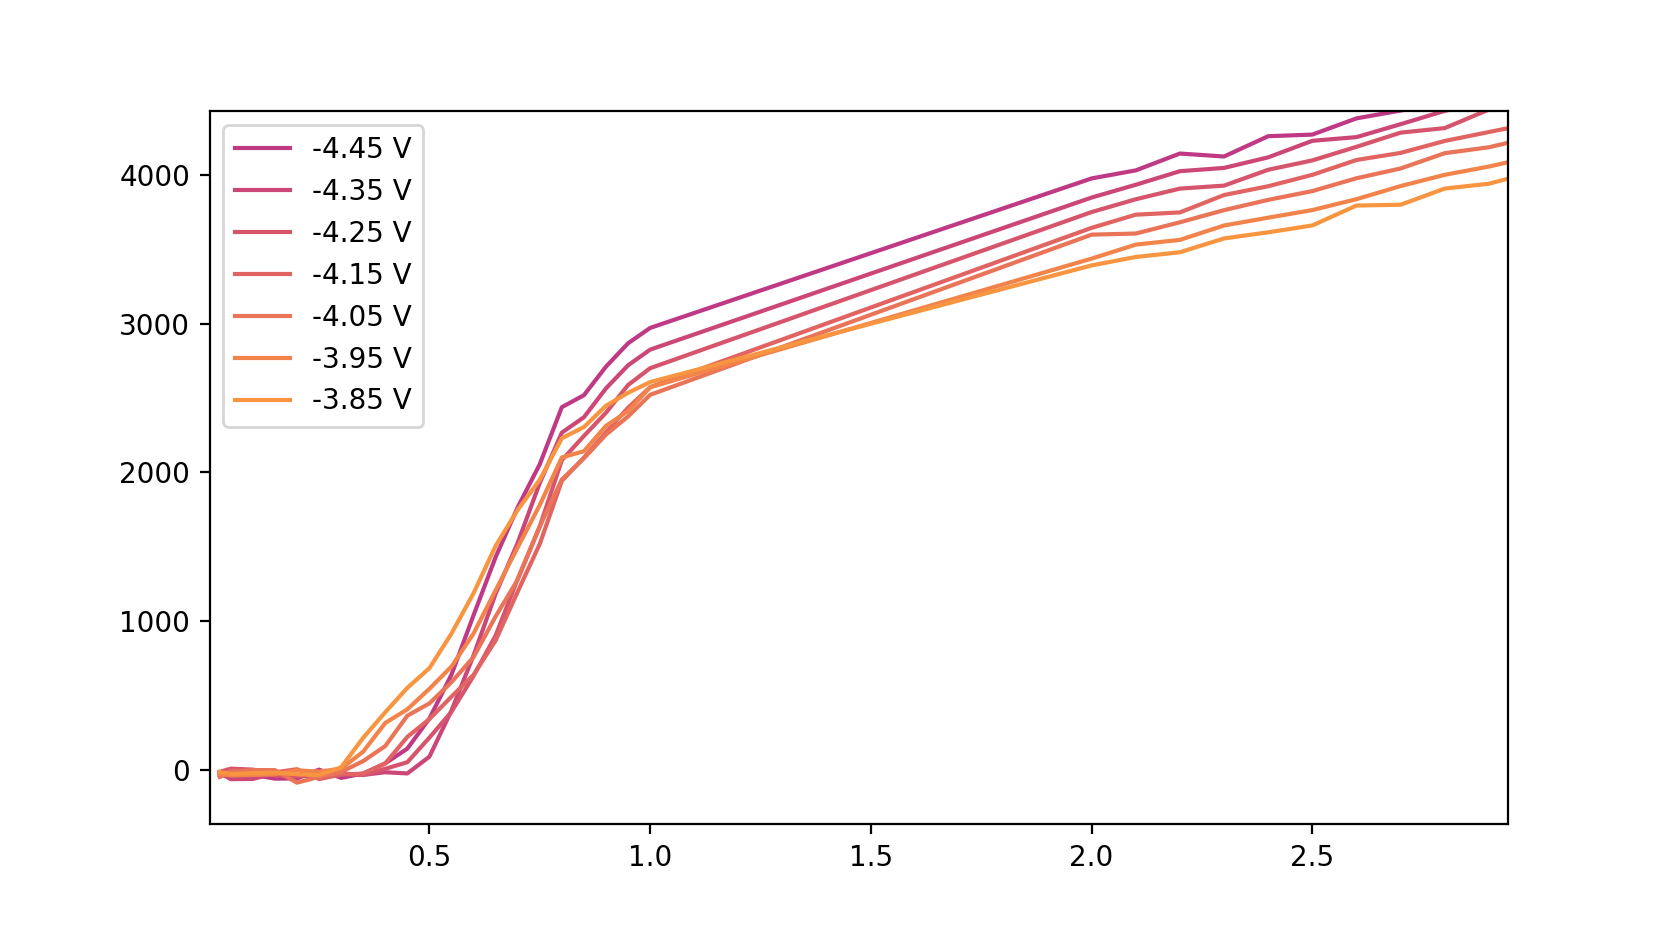

In [242]:
N = 20
cs = plt.get_cmap('plasma')([i/N for i in range(N)])
plt.figure()
for i in range(9, 16):
    gv = 93 + 2*i
    plt.plot(Tall, R3837_all[:, gv], color=cs[i], label='{} V'.format(Tgates[gv]))
    
plt.legend()

Electron Pocket

<IPython.core.display.Javascript object>


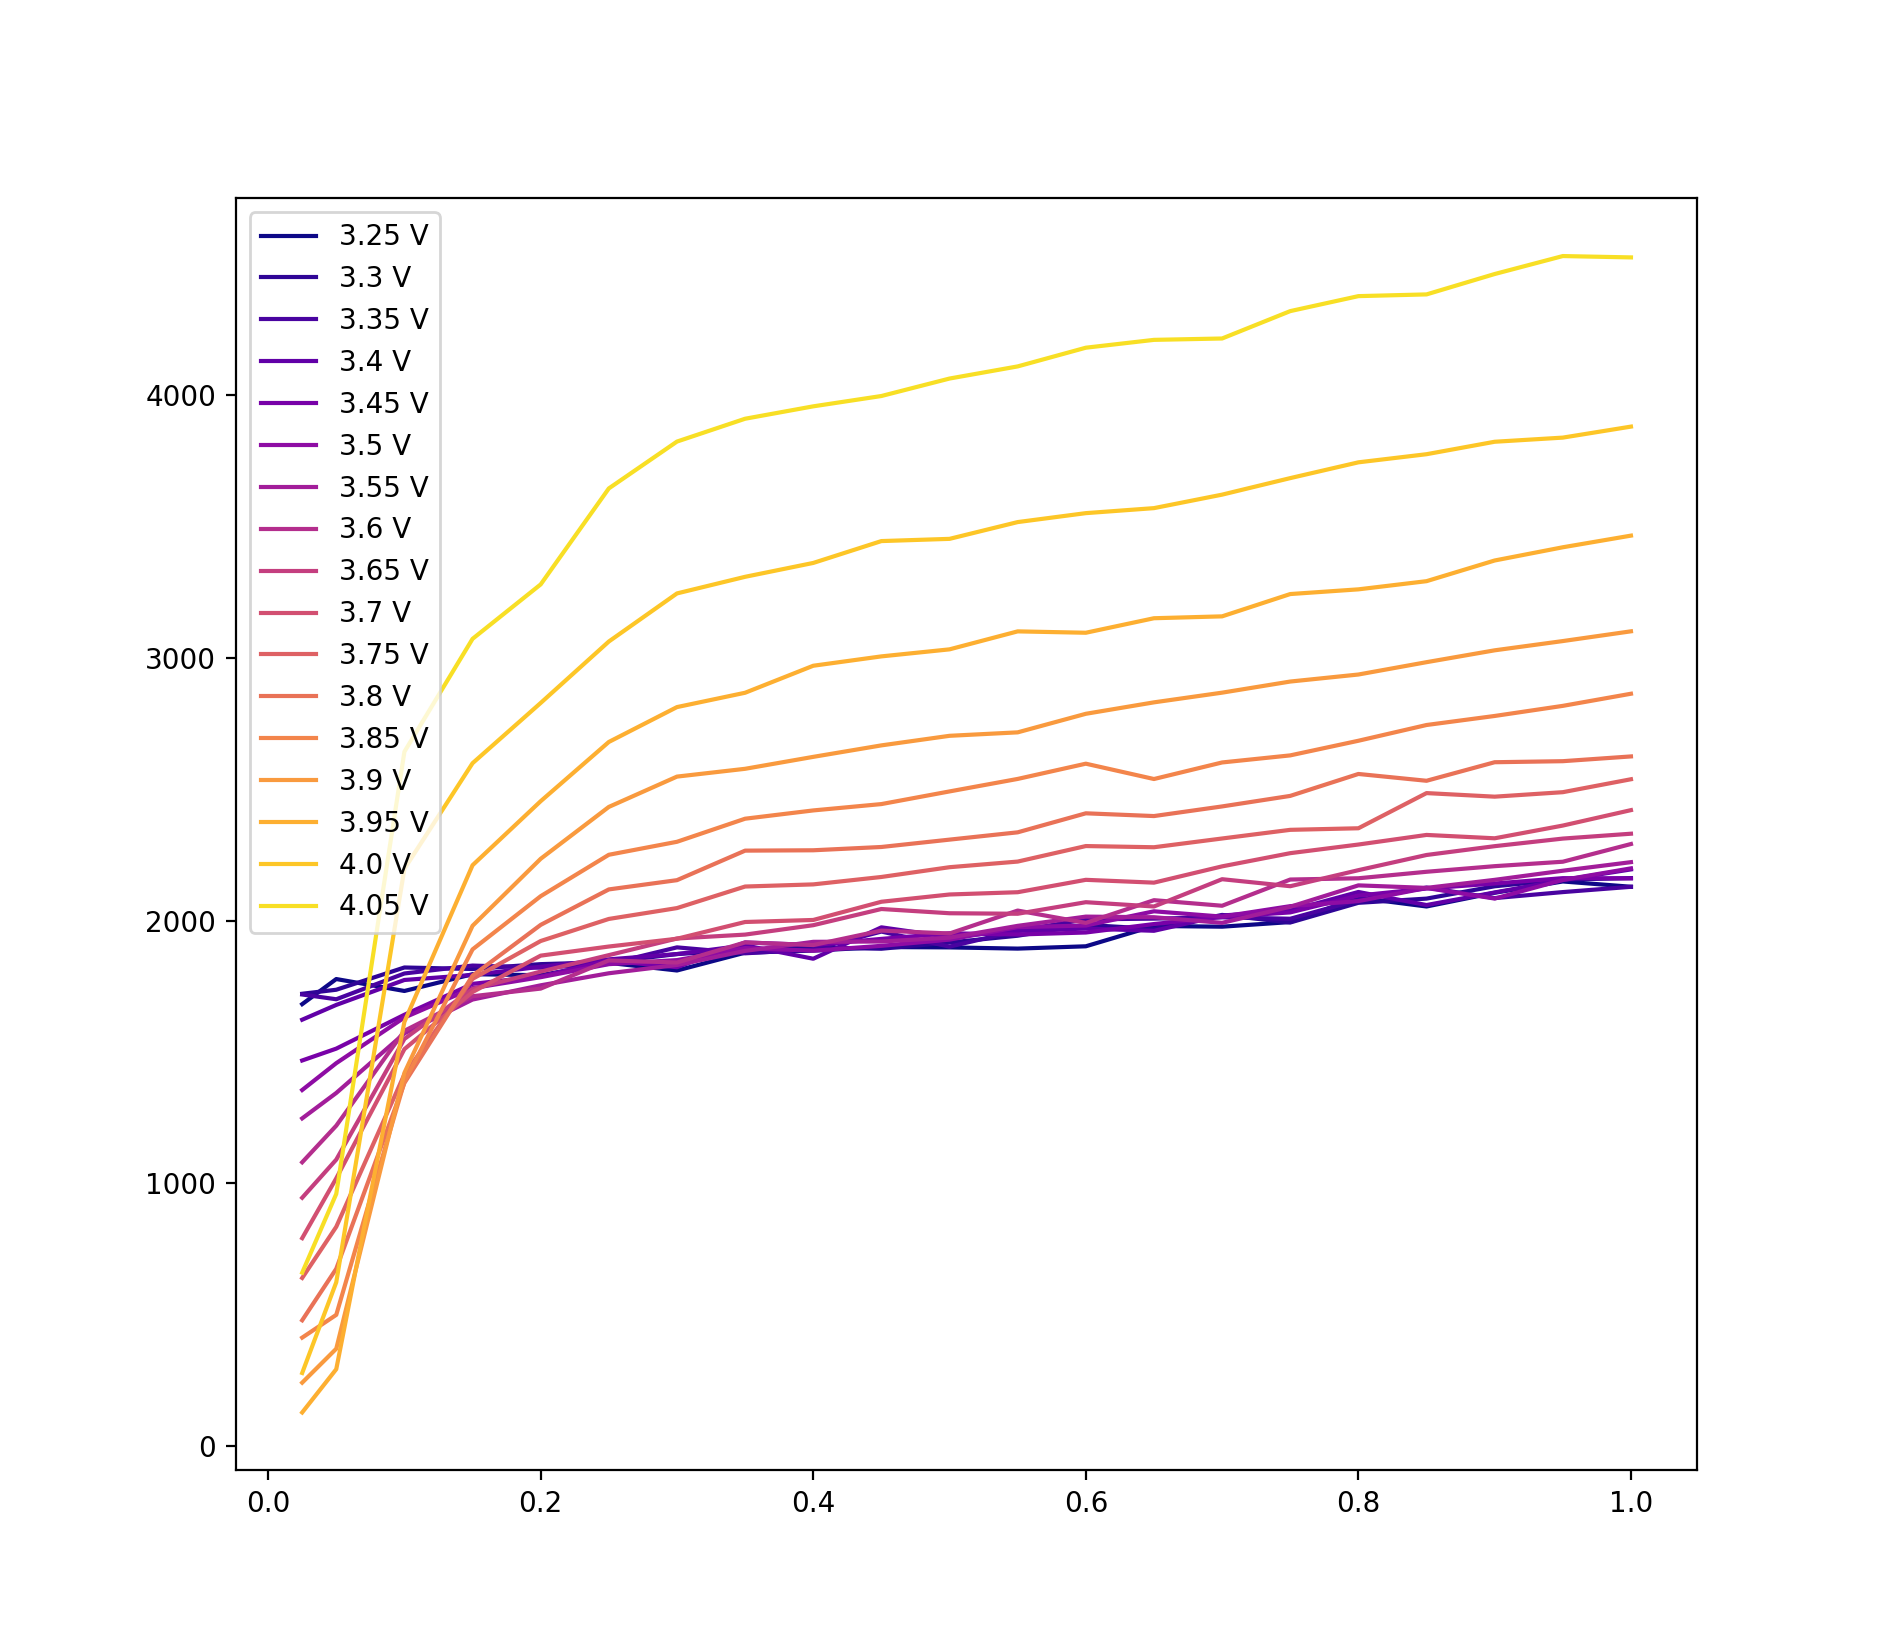

In [206]:
N = 17
cs = plt.get_cmap('plasma')([i/N for i in range(N)])
plt.figure()
for i in range(N):
    gv = 265 + i
    plt.plot(T, R3837[:, gv], color=cs[i], label='{} V'.format(Tgates[gv]))
    
plt.legend()

In [85]:
dbneg = qc.load_data('data/2019-10-17/#003_M08_Rxx38-37_Rxy38-44_0p2nA_0to7p5Vbg_fielddown_narrow-8Tto0T_22-49-00')
dbpos = qc.load_data('data/2019-10-18/#001_M08_Rxx38-37_Rxy38-44_0p2nA_0to7p5Vbg_fielddown_narrow-0Tto5T_05-41-46')
dbnegdown = qc.load_data('data/2019-10-17/#002_M08_Rxx38-37_Rxy38-44_0p2nA_0to7p5Vbg_fielddown_narrow_15-45-50')

In [92]:
fields = np.concatenate((dbneg.triton_field_set_stable_set, dbpos.triton_field_set_stable_set))
gates = dbneg.srframe_volt_p1_set[0, :]
R = np.vstack((dbneg.lockin865_X[:, :], dbpos.lockin865_X[:, :]))/0.2e-9
Rxy = np.vstack((dbneg.lockin830_X[:, :], dbpos.lockin830_X[:, :]))/0.2e-9
Rxy_Y = np.vstack((dbneg.lockin830_Y[:, :], dbpos.lockin830_Y[:, :]))/0.2e-9
Rxy_R = np.sqrt(Rxy**2 + Rxy_Y**2)

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


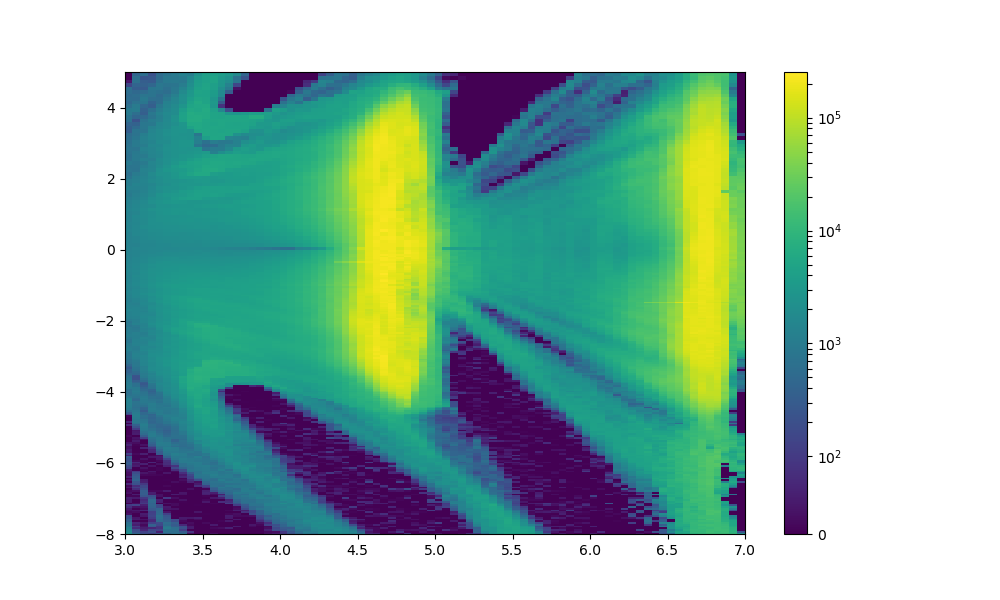

In [93]:
plt.figure(figsize=(10,6))
plt.pcolormesh(gates, fields, R, norm=SymLogNorm(100, vmin=0))
plt.colorbar()

<IPython.core.display.Javascript object>


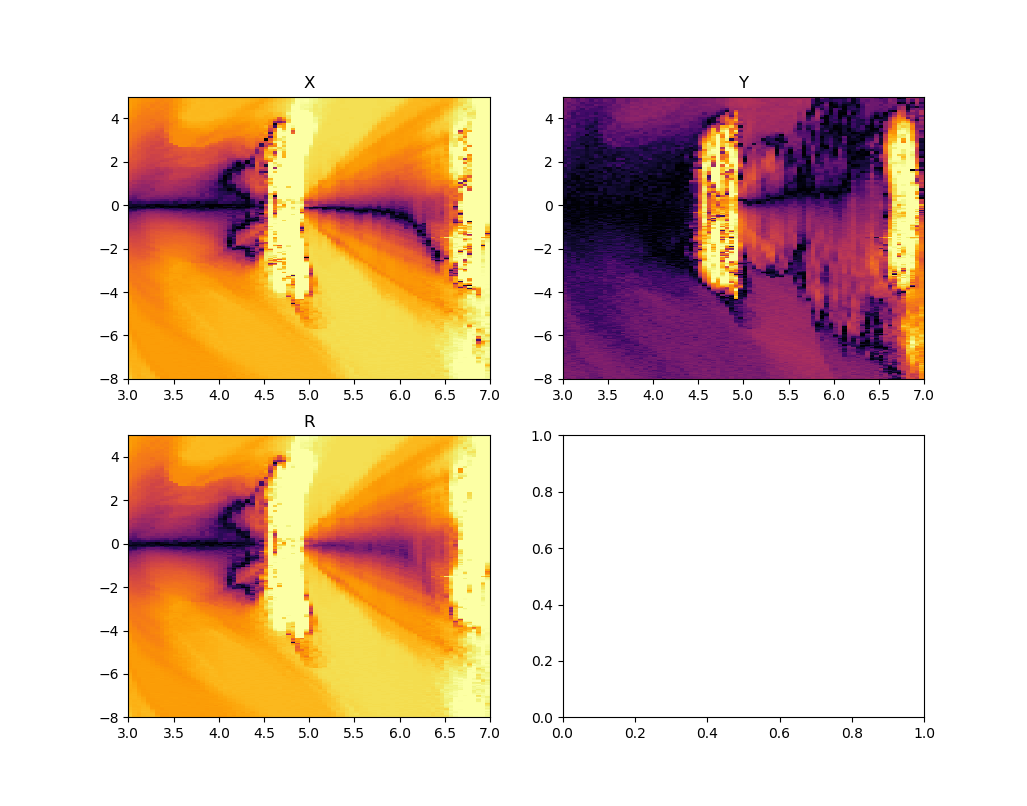

Text(0.5, 1.0, 'R')

In [62]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].pcolormesh(gates, fields, np.abs(Rxy), norm=SymLogNorm(500,vmax=2*10**4, vmin=0), cmap='inferno')
ax[0,0].set_title('X')
ax[0, 1].pcolormesh(gates, fields, np.abs(Rxy_Y), norm=SymLogNorm(500,vmax=2*10**4, vmin=0), cmap='inferno')
ax[0,1].set_title('Y')
ax[1, 0].pcolormesh(gates, fields, np.abs(Rxy_R), norm=SymLogNorm(500,vmax=2*10**4, vmin=0), cmap='inferno')
ax[1,0].set_title('R')

In [117]:
 inds = npd.val_to_index([3, 3.5, 4, 4.2], gates)
#inds = npd.val_to_index([3.7], gates)

<IPython.core.display.Javascript object>


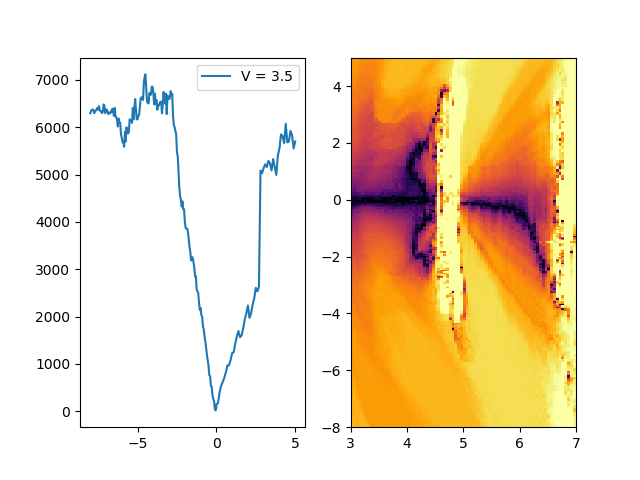

In [129]:
fig, ax = plt.subplots(1, 2)
for i in inds:
    ax[0].plot(fields, np.abs(Rxy[:, i]), label='V = {}'.format(gates[i]))
ax[0].legend()
ax[1].pcolormesh(gates, fields, np.abs(Rxy), norm=SymLogNorm(500,vmax=2*10**4, vmin=0), cmap='inferno')

<IPython.core.display.Javascript object>


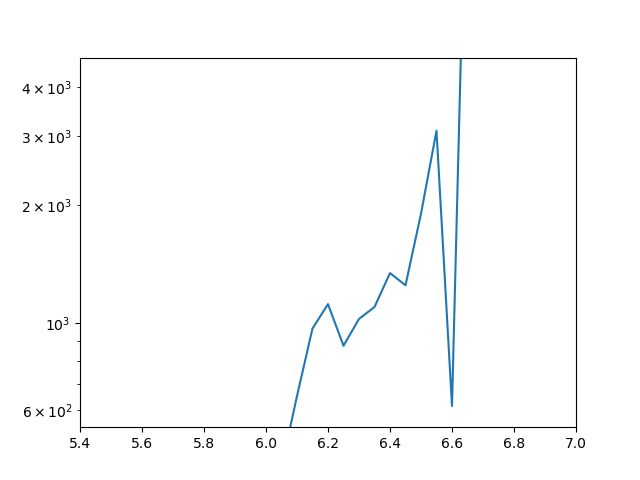

(400, 3500)

In [70]:
zind = npd.val_to_index([0], fields)[0]
plt.figure()
plt.semilogy(gates, np.abs(Rxy[zind-2, :]))
plt.xlim((5, 6.6))
plt.ylim((400, 3500))

In [41]:
esqh = 1.6e-19**2/6.6e-34

In [71]:
1/esqh/12

2148.4375

In [94]:
dpos8 = qc.load_data('data/2019-10-17/#001_M08_Rxx38-37_Rxy38-44_0p2nA_0to7p5Vbg_fielddown_06-57-02')

In [96]:
g8 = dpos8.srframe_volt_p1_set[0, :]
g8

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.

In [102]:
b8 = dpos8.triton_field_set_stable_set[:]
R8xy = dpos8.lockin830_X[:, :]/0.2e-9

In [107]:
npd.val_to_index([3, 7], g8)

[60, 140]

<IPython.core.display.Javascript object>


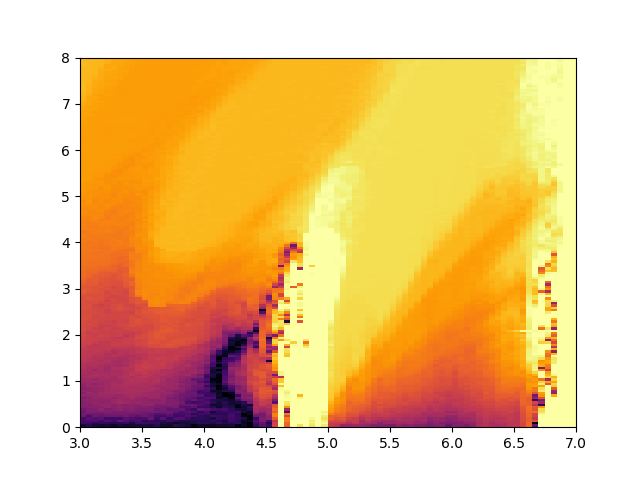

In [108]:
plt.figure()
plt.pcolormesh(g8[60:141], b8, np.abs(R8xy[:, 60:141]), norm=SymLogNorm(500,vmax=2*10**4, vmin=0), cmap='inferno')

In [126]:
fields2 = np.concatenate((dbneg.triton_field_set_stable_set, dpos8.triton_field_set_stable_set[::-1]))
gates2 = dbneg.srframe_volt_p1_set[0, :]
R2 = np.vstack((dbneg.lockin865_X[:, :], np.flip(dpos8.lockin865_X[:, 60:141], axis=0)))/0.2e-9
Rxy2 = np.vstack((dbneg.lockin830_X[:, :], np.flip(dpos8.lockin830_X[:, 60:141], axis=0)))/0.2e-9
Rxy_Y2 = np.vstack((dbneg.lockin830_Y[:, :], np.flip(dpos8.lockin830_Y[:, 60:141], axis=0)))/0.2e-9
Rxy_R2 = np.sqrt(Rxy2**2 + Rxy_Y2**2)

<IPython.core.display.Javascript object>


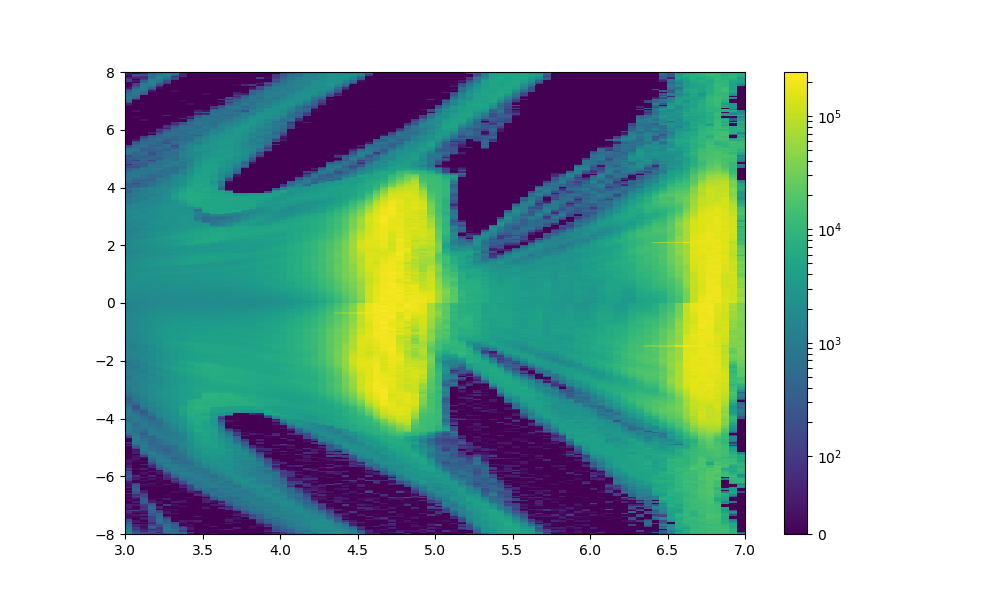

In [112]:
plt.figure(figsize=(10,6))
plt.pcolormesh(gates2, fields2, R2, norm=SymLogNorm(100, vmin=0))
plt.colorbar()

<IPython.core.display.Javascript object>


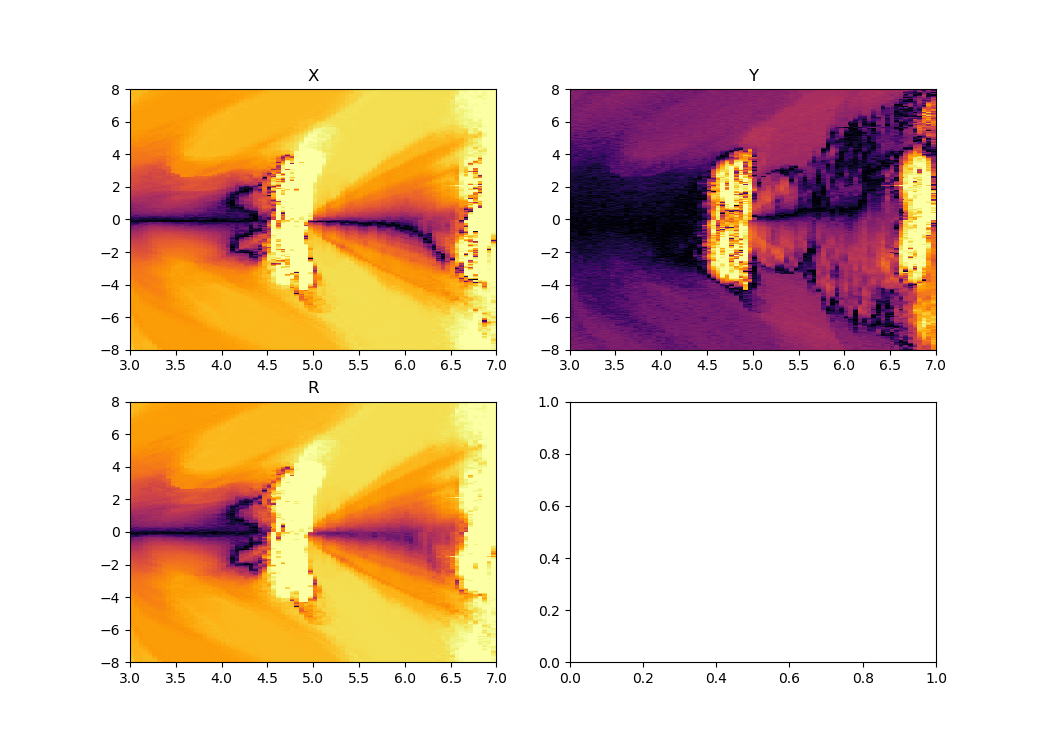

Text(0.5, 1.0, 'R')

In [114]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].pcolormesh(gates2, fields2, np.abs(Rxy2), norm=SymLogNorm(500,vmax=2*10**4, vmin=0), cmap='inferno')
ax[0,0].set_title('X')
ax[0, 1].pcolormesh(gates2, fields2, np.abs(Rxy_Y2), norm=SymLogNorm(500,vmax=2*10**4, vmin=0), cmap='inferno')
ax[0,1].set_title('Y')
ax[1, 0].pcolormesh(gates2, fields2, np.abs(Rxy_R2), norm=SymLogNorm(500,vmax=2*10**4, vmin=0), cmap='inferno')
ax[1,0].set_title('R')

<IPython.core.display.Javascript object>


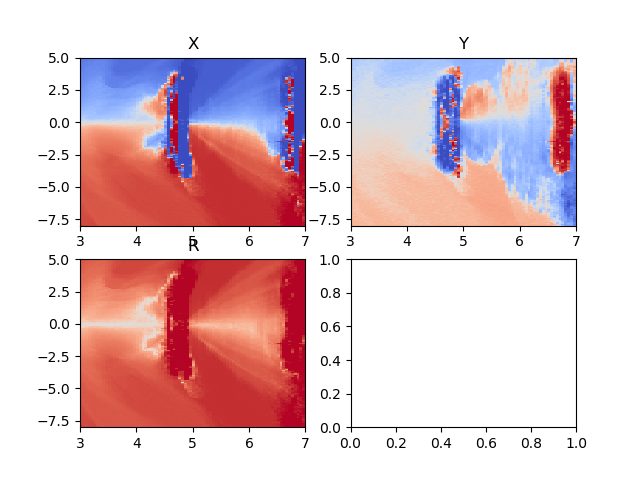

Text(0.5, 1.0, 'R')

In [147]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].pcolormesh(gates, fields, (Rxy), norm=SymLogNorm(500,vmax=2*10**4, vmin=-2*10**4), cmap='coolwarm')
ax[0,0].set_title('X')
ax[0, 1].pcolormesh(gates, fields, (Rxy_Y), norm=SymLogNorm(500,vmax=2*10**4, vmin=-2*10**4), cmap='coolwarm')
ax[0,1].set_title('Y')
ax[1, 0].pcolormesh(gates, fields, (Rxy_R), norm=SymLogNorm(500,vmax=2*10**4, vmin=-2*10**4), cmap='coolwarm')
ax[1,0].set_title('R')

<IPython.core.display.Javascript object>


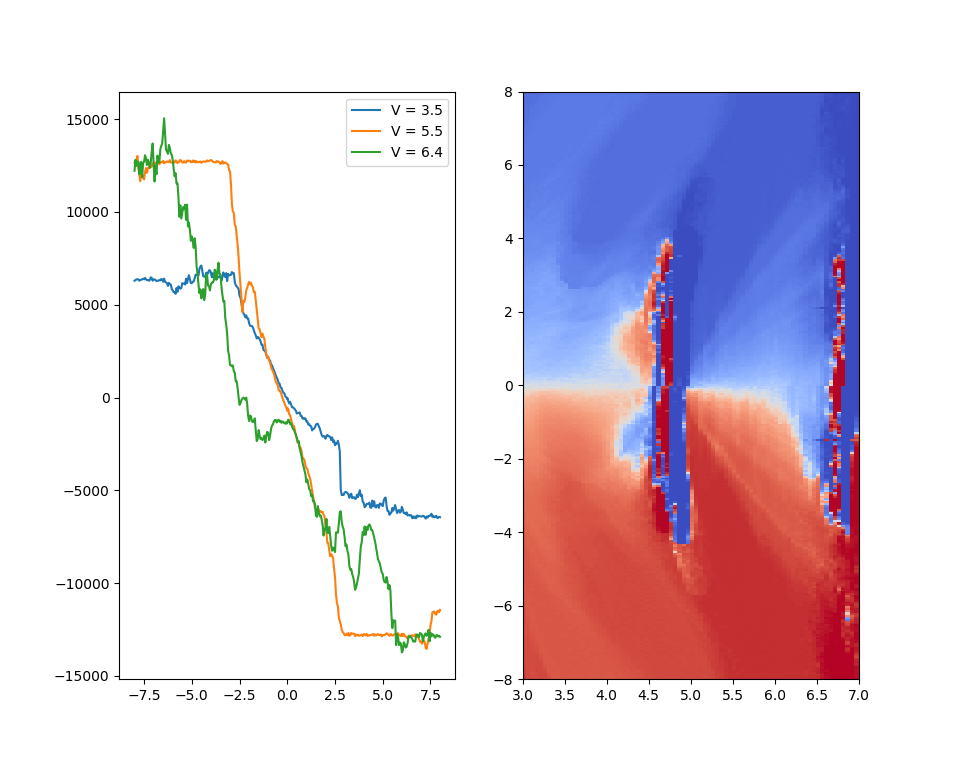

In [145]:
 inds = npd.val_to_index([3.5, 5.5, 6.4], gates)
fig, ax = plt.subplots(1, 2)
for i in inds:
    ax[0].plot(fields2, (Rxy2[:, i]), label='V = {}'.format(gates2[i]))
ax[0].legend()
ax[1].pcolormesh(gates2, fields2, (Rxy2), norm=SymLogNorm(500,vmax=2*10**4, vmin=-2*10**4), cmap='coolwarm')

In [138]:
1/esqh/12

2148.4375